<h1><center><b> Swire-CC Innovation Product Forecasting - Modelling </b></center></h1>

## <b>Author: Abinav Yadamani</b>


<h1><center><b>Table of Contents</b></center></h1> <a name="11."> </a>

#### 1. <a href="#1.">Introduction</a>
#### 2. <a href="#2.">Project Goal & Analytics Approach</a>
#### 3. <a href="#3.">Data Description & Missing Value Analysis</a>
#### 4. <a href="#Q1_Modelling">Q1 Modelling</a>
#### 9. <a href="#Q5_Modelling">Q5 Modelling</a>

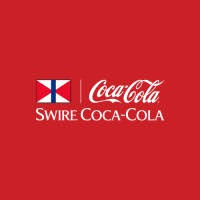


## Business Problem Introduction <a name="1."> </a>

### <b> Innovative Product Business </b>

<p style='text-align: justify;'>Launching innovative products is crucial for beverage companies to drive revenue growth, diversify the product portfolio, attract broader consumer categories, and strengthen brand visibility and loyalty. These products will also cater to recent  trends over prioritizing health and sustainability. Innovative products also boosts profit as these are offered at premium pricing. Overall, product innovation is critical for staying relevant in a dynamic market, ultimately boosting revenue and sustaining long-term growth. Swire Coca-Cola is constantly introducing innovation products into the market.
</p>

### <b> Business Problem </b>

<p style='text-align: justify;'>Swire Coca-Cola faces a business challenge in optimizing production planning and inventory management for its innovative beverage products segment. These products do not have a exact match of the historic sales and Swire in the past have faced situations on both the extremes, i.e., leaving money on the table due to lower estimations of exact demand and then over production leading to product distress.

 The company aims to accurately forecast the weekly demand, identify the most profitable region and time periods for launching these products using historical sales and market data of similar products of Swire and it's competitiors, along with customer demographic information to strike a balance between both out-of-stock and overproduction situations.
</p>

## Project Goal <a name="2."> </a>

The goals of this project are as follows:

1. Match and map the 7 innovative products provided by Swire with the historical data.
2. Depending on the question, identify the best region, time period and the forecasted demand.
3. Use time series forecasting methods such as ARIMA, SARIMA and Prophet to forecast demand.
4. Split the data into train-test for model evaluation to justify the models used and results obtained.
5. Measure the model performance using error metrics like MAE, MAPE & RMSE by comparing the estimated demand with the actual values for the train and test sets.
6. Use the model to forecast demand, time period or region. 



### <b> Modelling Notebook Purpose</b>

<p style='text-align: justify;'>The purpose of this notebook to develop multiple models to accurately forecast demand on a weekly basis for the given 7 innovative products. These models will be used by Swire to solve the problem with planning production and inventory for these products with the outcome being Swire takes maximum advantage to boost revenue from these innovative products with minimal overproduction. 
</p>

<h2> Modelling Approach & Assumptions</h2> <a name="3."> </a>


<h3> Approach </h3>
<p style='text-align: justify;'>The products that we are dealing with are innovative products, meaning, these products do not have an exact replica of sales in the past. Without historical data, building a model will pose a major challenge and blocker to this project. 

<p style='text-align: justify;'> To overcome this, the approach that we will be taking is to match and map the product attributes (Flavor/ Category/ Caloric Segment/ Package/ Manufacturer/ Brand) by use them to filter the data and then develop forecasting model. It would not be possible to apply all the 6 filters at a time, hence, we will be using 2-3 sets of filters for modelling in order to capture all the nuances in the data. Once we have a forecast with the initial set of filters, we will account for the remaining set of filters. 
 </p>
 
<h4> Filtering Strategy </h4>
    
<b> Why Flavor? </b>
<p style='text-align: justify;'>
    
We will be filtering the dataset by flavor of the innovative product first because flavor is a primary determinant of consumer appeal and purchasing behavior in the beverage industry. Analyzing the performance of the specific flavor variant allows for a more targeted and accurate assessment of its market potential and forecasting demand. This targeted approach enables us to assess the demand and performance of the flavor independently of other variants or products within the same brand or category. Additionally, flavor is the a critical product attribute that might help capture seasonality in the dataset. This granularity in analysis improves the precision of our forecasting models
    
After flavor, the next important filters are brand/manufacturer, calory segment and category. 

<b> Why filtering by Category is important? </b>

Analyzing the category, whether "Regular" or "Diet/Light," is crucial in understanding consumer purchase behavior due to the following reasons:

- Health Consciousness & Lifestyle preferences: s. Consumers opting for "Diet/Light" products are likely motivated by health considerations, such as calorie control or sugar reduction, influencing their purchase decisions. This is critical especially in diabetic patients or in regions where we identified more senior population proportion.

- Impact on Demand: Consumer perception of a product's category can significantly impact its demand dynamics. Changes in health trends or dietary recommendations may influence the popularity of "Diet/Light" products, while factors like taste innovations or marketing campaigns may drive demand for "Regular" offerings.

<i>Later in the modelling we have observed strong correlation between diet product sales and time of the year. Diet sales is the highest towards the beginining of the year and then have gradually declined. This might be becasue people prefer healthier and low sugar options at the start of the year through new year resolutions.  <i>   

</p>
    
<b> Why filtering by Caloric Segment is important? </b>
    
Similar to Category, again consumer preferences led by taste and health are predominat in determining if they will purchase a specific water type or a energy drink. 
 
<b> Why filtering by manufacturer or Brand is important? </b>

Brand Loyalty: Consumers often exhibit brand loyalty, preferring products from specific brands due to factors such as trust, reputation, and perceived quality. Analyzing data specific to a brand therefore will be a more reliable forecast.

<h3>Assumptions </h3>

<b>1. Region Mapping </b>
<p style='text-align: justify;'>

    In the scope of the dataset, we have assumed regions and below is the mapping for the same:

- North West States: Washington (WA), Oregon (OR)

- North States: Idaho (ID), Wyoming (WY)

- South States: Arizona (AZ), New Mexico (NM)

- West States: Nevada (NV), California (CA)

- Central States: Utah (UT), Colorado (CO)

- East States: Nebraska (NE), South Dakota (SD), Kansas (KS)

<br>
<b> 2. 13 weeks of the year - consecutive or best 13 of the year? </b>

The questions provided by Swire does not specify if the 13 weeks needs to be consecutive or can be the top 13 weeks of the year in any random fashion. For the sake of this project, we will consider the best set of 13 consecutive weeks. The reason for this is simple: In the inital couple of meetings with the Swire stakeholders, we were notified that based on how well the product performs in the following weeks post launch, retail stores shall be restocked. Morever, it might be a feasible option for Swire to launch a new product only for 1 week and then again restock several months later, which is not reasonable at all. Keeping all these factors in mind, in the scope of this project, when the questions asks which 13 weeks of the year, we will assume which consecutive 13 weeks of the year. 
    
<b> 3. Empahsis on Unit Sales over Dollar Sales? </b>
    
The business problem revolves around forecasting sales and not predicting revenue. Therefore, we will prioritize unit sales as it provide better insights into how many units Swire will need to be ready before launching a product, and the necessary restocking of the retail stores. This will also eliminate multicollinearity as identified in the EDA phase.
</p>

<b> 4. Potential outliers? </b>

In the notebook, you will find outliers detected for few products. However, since we were informed that the data has gonr through thorough cleaning already by the stakeholders before handing it over to us, we will not remove any outliers.  

### Data Preparation

<p style='text-align: justify;'>
Data Preparation is the process of transforming raw data into a format that is suitable for analysis and modeling. This includes steps such as variable transformations, feature engineering and handling NAs. In the context of this project, data preparation will vary depending on the question. Some examples of data preparation are as follows:

1. For instance, questions with region involved will need a column to be added for marking regions based on the states that we mapped from the EDA. 

2. Another instance of data preparation is that for the Prophet model, the inputs to the model needs to be formatted as 'ds' and 'y' columns only where ds is the date column and y is the actual values of the target variable. In our case we will focus on unit sales only and neglect dollar sales since from the EDA we observed very strong multi-collinearity between these two variables.  

3. In the EDA phase, missing values have been identified for few particular Brands were missing. After thorough analysis on these brands, we have already imputed them. 

In addition to the above pointed out pre-model work, question and model specific data preparation will be listed wherever necessary throughout the notebook.


</p>


In [2]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Setting the warnings to be ignored
warnings.filterwarnings('ignore')

In [6]:
#market_data = pd.read_csv(r"/content/drive/MyDrive/FACT_MARKET_DEMAND_Ref.csv")
import pandas as pd
market_demand = pd.read_csv("FACT_MARKET_DEMAND-001.csv")

Data Preparation:
Let's impute with the NA's in Caloric Segment with Regular type as that is the mode. The explanation for this as already been covered in the EDA were found that all the missing values were from three Brands only and all the products from these brands were Null for the caloric segment. Upon digging deeper on the other aspects of the brand, it was concluded that Regular which is also a majority in the dataset is the right imputation strategy. 

In [7]:
market_demand['CALORIC_SEGMENT'].fillna(market_demand['CALORIC_SEGMENT'].mode()[0], inplace=True)
print("\nMissing value imputation check:")
print(market_demand.isnull().sum().sum())


Missing value imputation check:
0


<h2> Q1 </h2> <a name="Q1_Modelling"></a>

Item Description: Diet Smash Plum 11Small 4One
- Caloric Segment: Diet
- Market Category: SSD
- Manufacturer: Swire-CC
- Brand: Diet Smash
- Package Type: 11Small 4One
- Flavor: ‘Plum’

Which 13 weeks of the year would this product perform best in the market? What is the forecasted demand, in weeks, for those 13 weeks?


Begining filtering by Flavor:

In [8]:
# filtering for Plum
plum = market_demand[(market_demand['ITEM'].str.contains('PLUM', case=False, regex=True))]

Adding a week number column:

In [9]:
# Assuming 'DATE' column is in datetime format
plum['DATE'] = pd.to_datetime(plum['DATE'])

# Find the earliest date
earliest_date = plum['DATE'].min()

# Calculate the week numbers from the earliest date
plum['WEEK_NUMBER'] = (plum['DATE'] - earliest_date).dt.days // 7 + 1

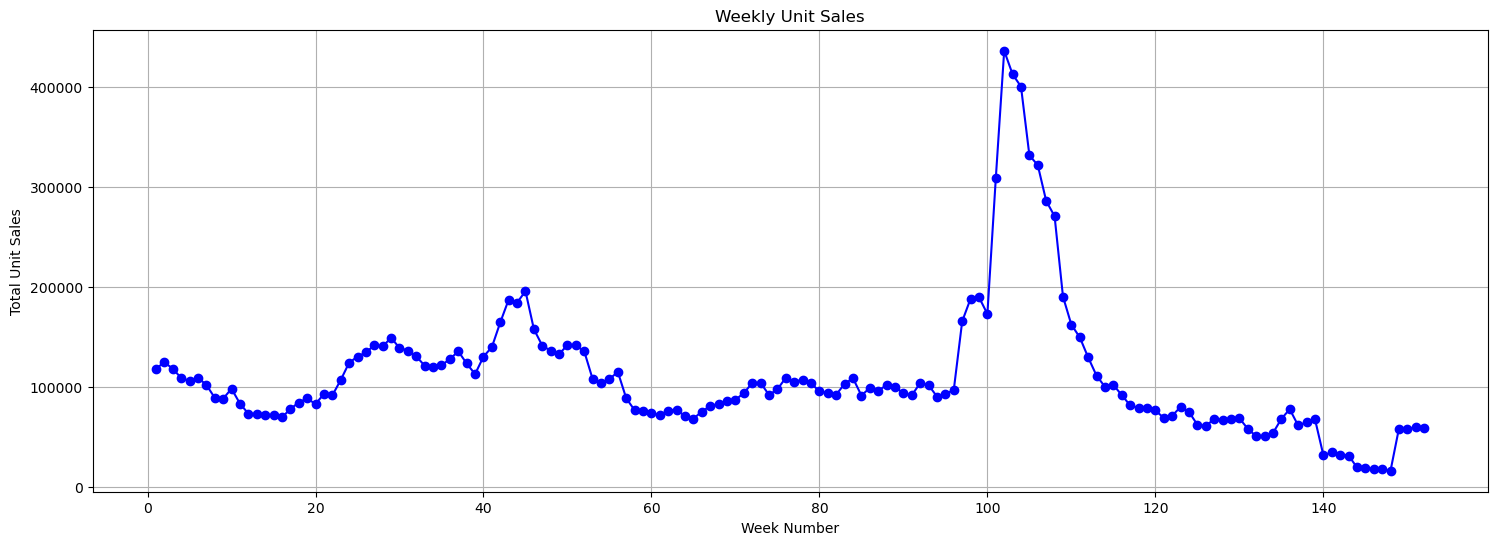

In [10]:

# Aggregate data by week number
weekly_sales = plum.groupby('WEEK_NUMBER')['UNIT_SALES'].sum()

# Plot time series
plt.figure(figsize=(18, 6))
weekly_sales.plot(marker='o', color='blue', linestyle='-')
plt.title('Weekly Unit Sales')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(True)
plt.show()

Plum appears to have good sales during the beginining and end weeks of the year. Lets also filter by Swire now and look at a holistic chart for sales all the years for Plum + Swire:

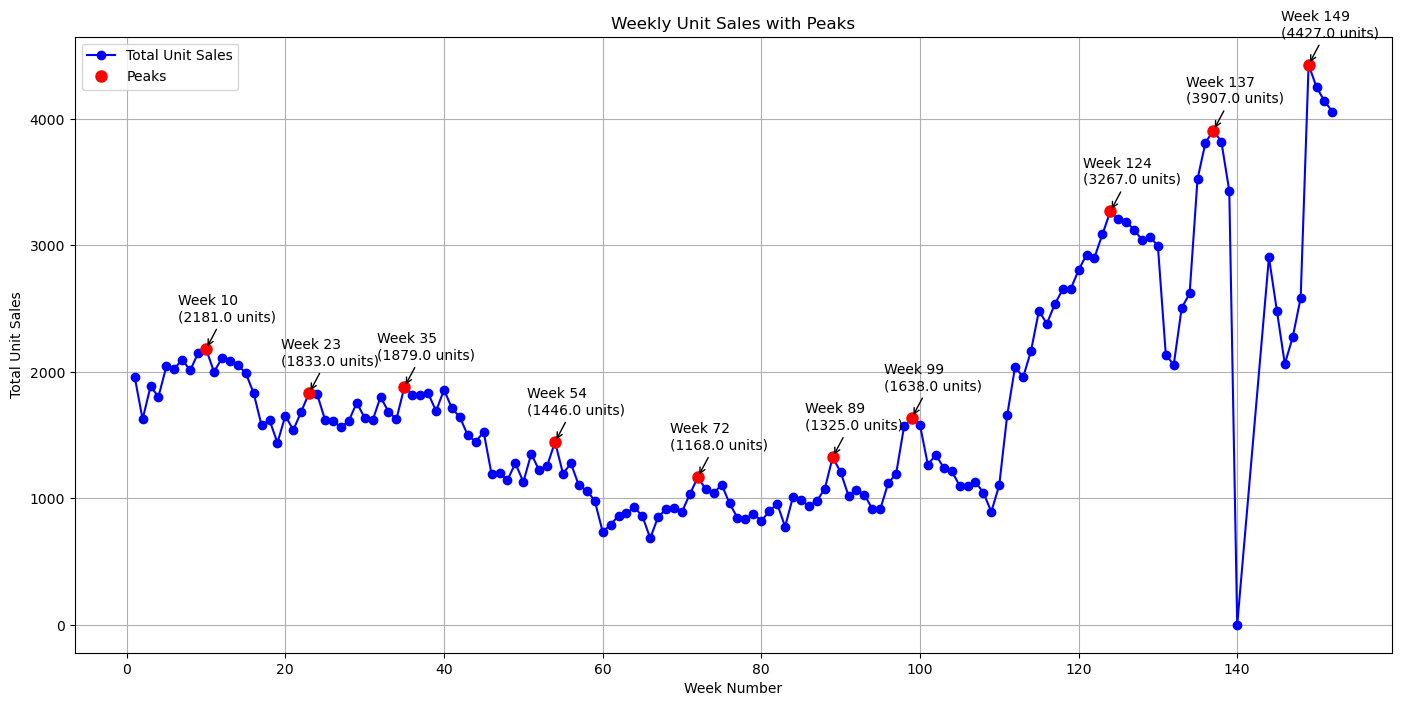

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Assuming 'plum' dataframe contains 'WEEK_NUMBER' and 'UNIT_SALES' columns

# Aggregate data by week number
weekly_sales = plum[plum['MANUFACTURER'] == 'SWIRE-CC'].groupby('WEEK_NUMBER')['UNIT_SALES'].sum()

# Find local maxima (peaks)
peaks_index = argrelextrema(weekly_sales.values, comparator=lambda x, y: x > y, order=5)[0]
peaks = weekly_sales.iloc[peaks_index]

# Plot time series with peaks
plt.figure(figsize=(17, 8))
weekly_sales.plot(marker='o', color='blue', linestyle='-', label='Total Unit Sales')
peaks.plot(marker='o', color='red', linestyle='', markersize=8, label='Peaks')

# Annotate peaks with week number
for week, sales in peaks.items():
    plt.annotate(f'Week {week}\n({sales} units)', xy=(week, sales), xytext=(-20, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))



plt.title('Weekly Unit Sales with Peaks')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(True)
plt.legend()
plt.show()

Looks like peaks are approximately 13 week gap and Swire might be restocking the shelves.

Lets group by weeks of the year to gauge sales with time of the year:

Graph seems to have changed all together. We observe multiple local peaks appearing at week 19, 31 and 44. 

Lets dive deeper by computing sales by aggregating sales data every 13 weeks:

In [27]:
plum['13_WEEK_INTERVAL'] = (plum['WEEK_NUMBER'] - 1) // 13 + 1


In [ ]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(80, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()



from the plot above using Plum + Swire data, we see that week 22-34 of the year are the highest from the historic data.  

<h3> Prophet Model </h3>

<h4> Data Preparation for Modelling </h4>

1. Missing values already imputed. 
2. Necessary data has been extracted by filtering. 
3. Since, we will have many data points on a daily basis, lets aggregate data by DAY so that every day consitiutes to one single point in the plot. 
4. Prophet model will need the inputs to be formatted as 'ds' and 'y' columns only where ds is the date column and y is the actual values of the target variable. 
5. Model will be validated using train-test split by verifying performance of the model trained on the train set, on the test set. 

In [ ]:
swire_plum = plum[plum['MANUFACTURER'] == 'SWIRE-CC']
swire_plum= swire_plum.sort_values('DATE')

swire_plum_daily = swire_plum.groupby('DATE')['UNIT_SALES'].sum().reset_index()
swire_plum_daily.head(2)

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import pandas as pd


# Convert DATE column to datetime if not already in datetime format
swire_plum_daily['DATE'] = pd.to_datetime(swire_plum_daily['DATE'])

# Sort the data by date
swire_plum_daily = swire_plum_daily.sort_values(by='DATE')

# Calculate the index for partitioning the data
partition_index = int(len(swire_plum_daily) * 0.8)

# Split the data into train and test sets
train_data = swire_plum_daily.iloc[:partition_index]
test_data = swire_plum_daily.iloc[partition_index:]

# Rename columns as per Prophet's requirements
train_data = train_data.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})
test_data = test_data.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

# Print the lengths of train and test dataframes
print("Length of Train Data:", len(train_data))
print("Length of Test Data:", len(test_data))

# Print the start and end dates of train and test dataframes
print("Start Date of Train Data:", train_data['ds'].min())
print("End Date of Train Data:", train_data['ds'].max())
print("Start Date of Test Data:", test_data['ds'].min())
print("End Date of Test Data:", test_data['ds'].max())



In [ ]:
# Initialize and fit the Prophet model
p_model = Prophet()
p_model.fit(train_data)

# Create future dates for forecasting
future = p_model.make_future_dataframe(periods=34, freq='W')

# Make predictions
forecast = p_model.predict(future)

# Plot the forecast
plot_plotly(p_model, forecast)

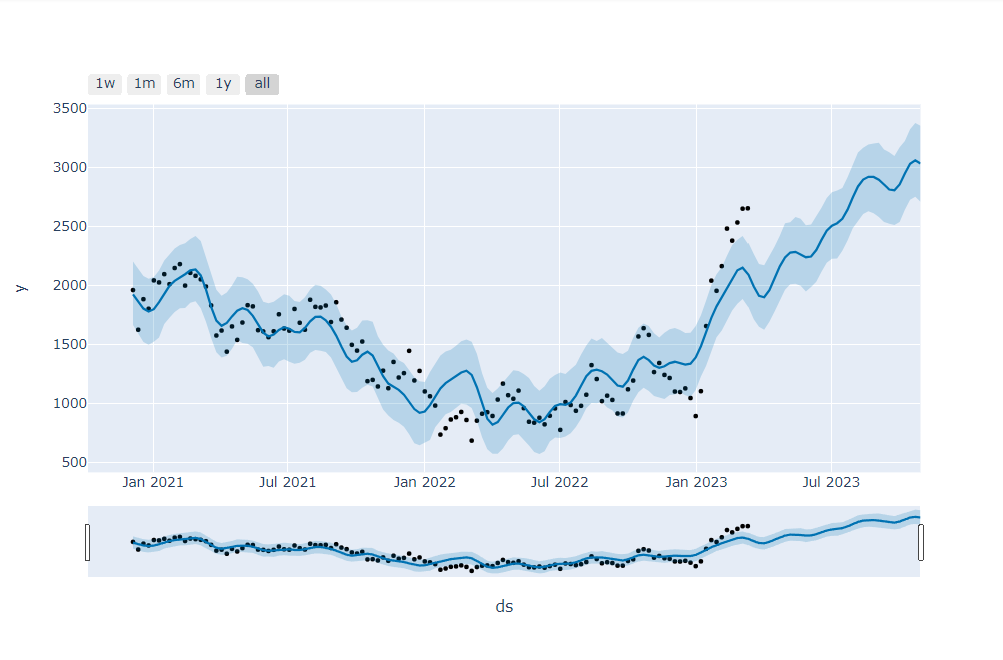

In [ ]:
plot_components_plotly(p_model, forecast)

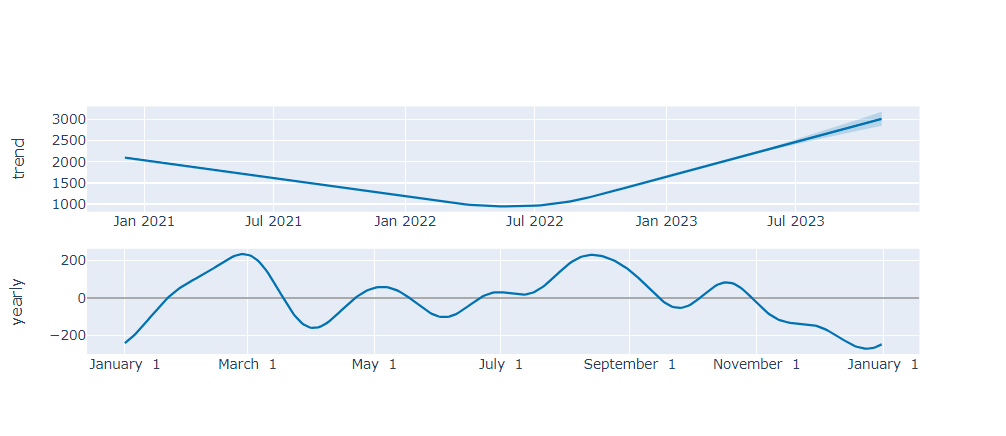

we observe that while the sales of plum for swire dipped in 2022, it bounces back in 2023 changing the trend upwards. The yearly chart above shows peaks during March and August. 

Lets plot a chart that shows how the model performed on the train and test sets:

In [ ]:
pred = forecast[['ds','yhat']]

In [ ]:
import matplotlib.pyplot as plt

# Plot test data
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Actual Train Set', color='blue')

plt.plot(test_data['ds'], test_data['y'], label = 'Actual Test Set',color='lightblue')

# Plot forecast data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecast')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


Model is unable to capture sharp spikes in the test set, but does a very fair job in capturing the trend and average revenue sales on a weekly basis. This is the expectation in fact. If the model is able to capture and respond to spikes, then that will be a case of overfitting and any outliers can do more harm than good for Swire. 

# Validation to be excuted

In [ ]:
get_scores(train_data['y'], pred['yhat'])

Lets compute 13 week aggregate sales:

In [122]:


# Sort the DataFrame by 'WEEK_NUMBER' if it's not already sorted
weekly_forecast_data = weekly_forecast_data.sort_values(by='WEEK_NUMBER')

# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_data.iloc[i]['WEEK_NUMBER']}-{weekly_data.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

    # Display the DataFrame with the rolling sum and 13-week intervals
# print(rolling_sales_df)


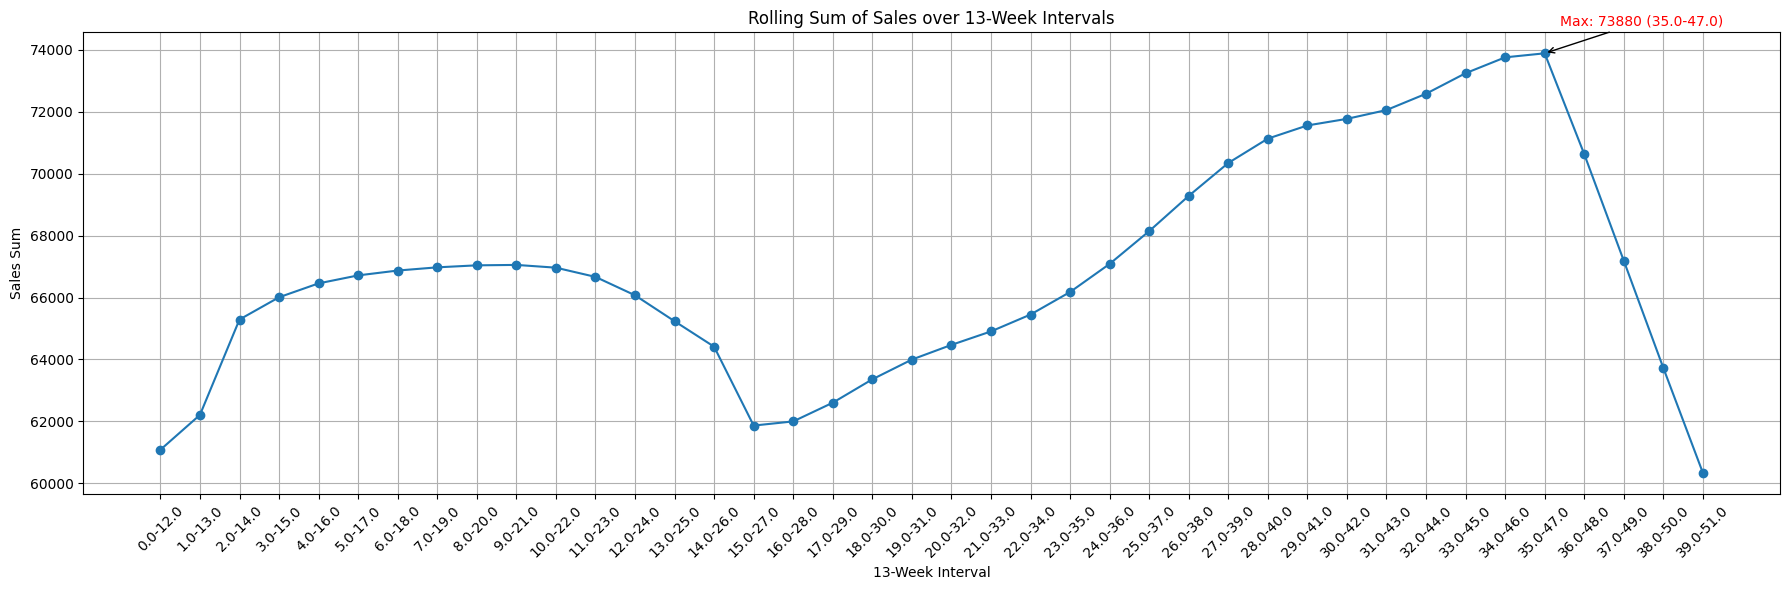

In [123]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = round(sales_sum[max_index])
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, 20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()



While historic data revealed week 22-34 fetching the highest sales, forecasted data shows that in 2024 week 35-47 period would fetch maximum sales for plum flavor for Swire. We see that the maximum values of 13 week aggregates for both historic and forecast are nearly the same (73k).

<h3> PLUM + SWIRE + DIET </h3>

In [ ]:
plum_swire_diet = swire_plum[swire_plum['CALORIC_SEGMENT'] == 'DIET/LIGHT']
plum_swire_diet_weekly_sales = plum_swire_diet.groupby('DATE')['UNIT_SALES'].sum().reset_index()
plum_swire_diet_weekly_sales.head(2)


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import pandas as pd


# Convert DATE column to datetime if not already in datetime format
plum_swire_diet_weekly_sales['DATE'] = pd.to_datetime(plum_swire_diet_weekly_sales['DATE'])

# Sort the data by date
plum_swire_diet_weekly_sales = plum_swire_diet_weekly_sales.sort_values(by='DATE')

plum_swire_diet_model_data = plum_swire_diet_weekly_sales.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

# Initialize and fit the Prophet model
p_model = Prophet()
p_model.fit(plum_swire_diet_model_data)

# Create future dates for forecasting
future = p_model.make_future_dataframe(periods=52, freq='W')

# Make predictions
forecast = p_model.predict(future)

# Plot the forecast
plot_plotly(p_model, forecast)

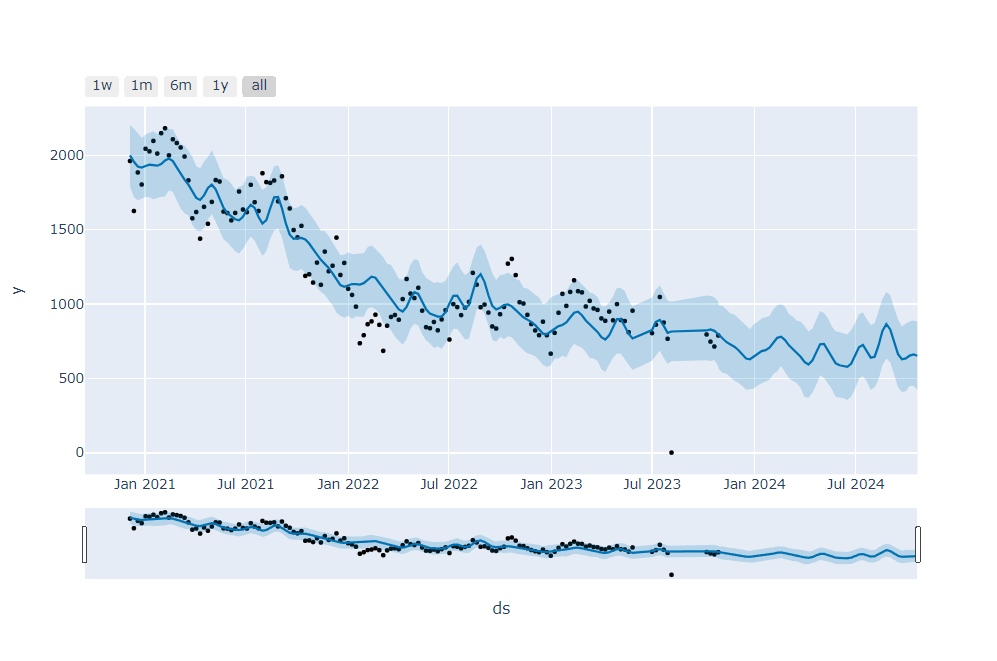

This is interesting, diet sales dipped in 2021 and from then on maintained a side ways to slighly negative trend.

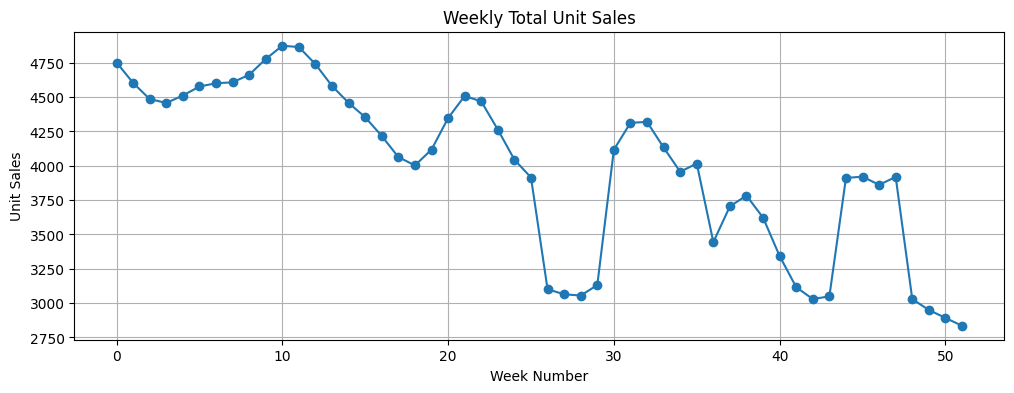

In [127]:
earliest_date = forecast['ds'].min()

# Step 2: Calculate week numbers
forecast['WEEK_NUMBER'] = ((forecast['ds'] - earliest_date).dt.days // 7) % 52
weekly_forecast_data = forecast.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

# Step 4: Create a time series plot
plt.figure(figsize=(12, 4))
plt.plot(weekly_forecast_data['WEEK_NUMBER'], weekly_forecast_data['yhat'], marker='o', linestyle='-')
plt.xlabel('Week Number')
plt.ylabel('Unit Sales')
plt.title('Weekly Total Unit Sales')
plt.grid(True)
plt.show()


In [128]:


# Sort the DataFrame by 'WEEK_NUMBER' if it's not already sorted
weekly_forecast_data = weekly_forecast_data.sort_values(by='WEEK_NUMBER')

# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_data.iloc[i]['WEEK_NUMBER']}-{weekly_data.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

    # Display the DataFrame with the rolling sum and 13-week intervals
    #print(rolling_sales_df)

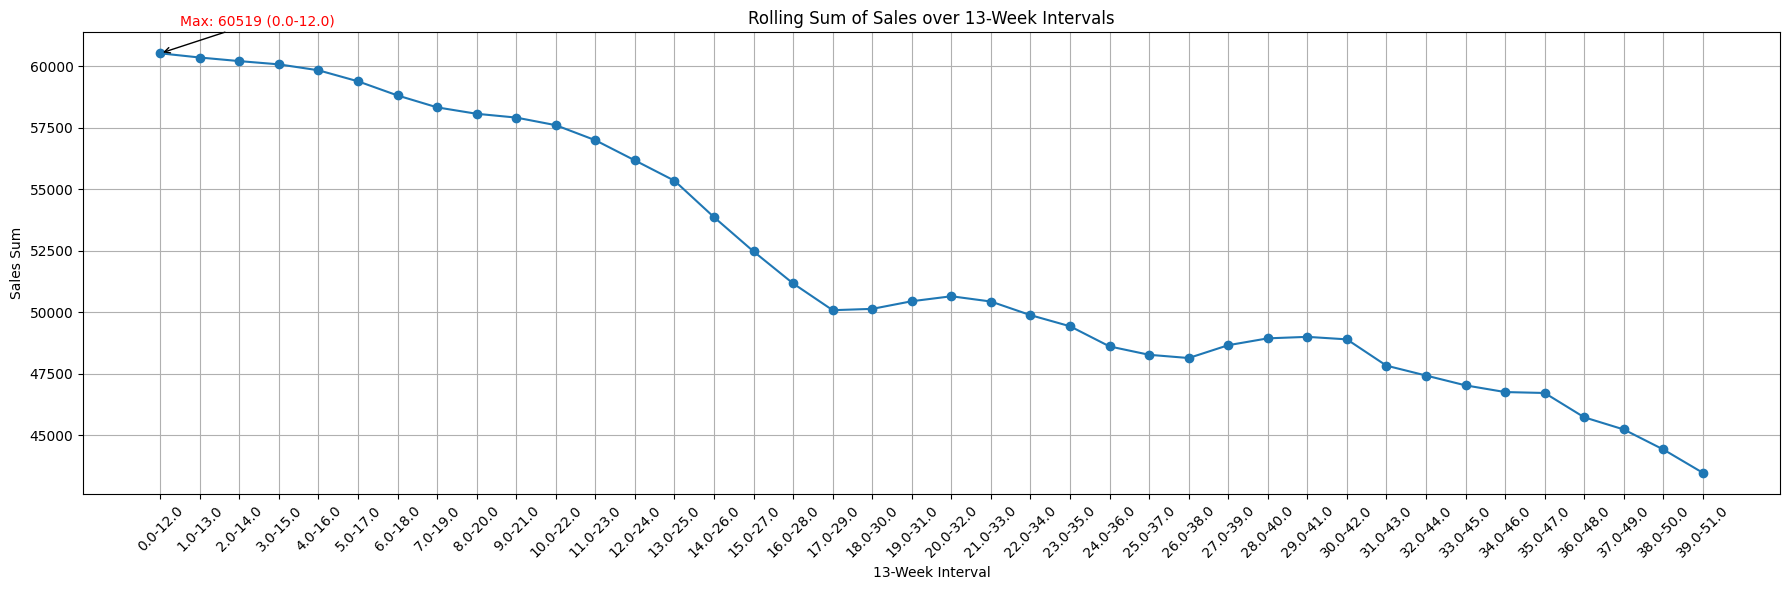

In [129]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = round(sales_sum[max_index])
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, 20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()


It is clear from the plot above that week 0-12 is the clear winner after filtering for diet caloric segment on top of plum and swire. Might indicate on how people on a new year take resolution on cutting down on sugars and as year progresses go back to their habits.

Now lets filter the forecasted data to last 1 year and extract the first 13 weeks of the year.

In [130]:
# week wise sales for best 13 weeks
best_13_weeks_q1 = forecast[(forecast['WEEK_NUMBER'] <= 12) & (forecast['ds'] > '2023-02-25')]
best_13_weeks_q1.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,WEEK_NUMBER
145,2023-12-03,752.538260,476.851987,886.220095,750.513944,754.733644,-61.95856,-61.95856,-61.95856,-61.95856,-61.95856,-61.95856,0.0,0.0,0.0,690.579701,0
146,2023-12-10,749.318607,435.234791,850.450446,746.771570,752.273543,-89.59627,-89.59627,-89.59627,-89.59627,-89.59627,-89.59627,0.0,0.0,0.0,659.722337,1


In [131]:
# Compute total sales for all 13 weeks
total_sales = best_13_weeks_q1['yhat'].sum()

# Compute lower and upper bounds for estimate
lower_bound = best_13_weeks_q1['yhat_lower'].sum()
upper_bound = best_13_weeks_q1['yhat_upper'].sum()

# Calculate confidence interval
confidence_interval = ((upper_bound - lower_bound) / total_sales) * 100

# Display the results
print("Total Sales for 13 weeks:", total_sales)
print("Lower Bound Estimate:", lower_bound)
print("Upper Bound Estimate:", upper_bound)
print("Confidence Interval (%):", confidence_interval)


Total Sales for 13 weeks: 9057.187762419222
Lower Bound Estimate: 6291.951059331268
Upper Bound Estimate: 11799.518942786954
Confidence Interval (%): 60.80880763351411


Therefore, the best 13 weeks are 0-12 weeks with a total sales forecast of 9058 units. The above lower and upper bound represent the lower and upper limits of the estimated sales range derived from the Prophet model.

CI % suggests that there is a 60.81% level of confidence that the true sales value falls within the range defined by the lower and upper bounds. Lets visualize through a plot:

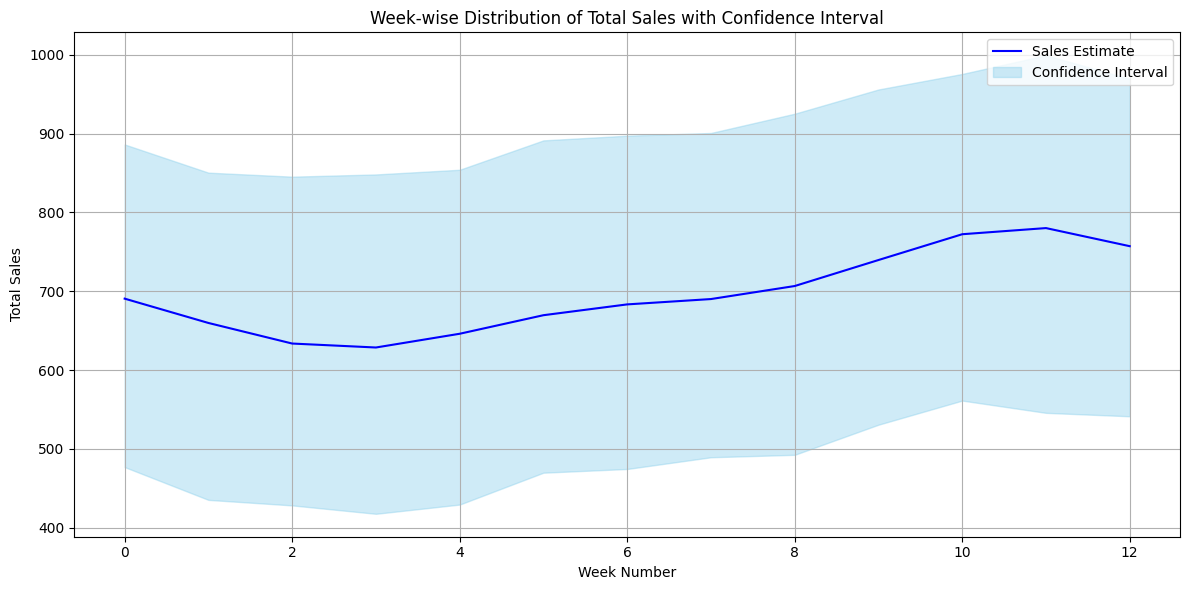

In [132]:
import matplotlib.pyplot as plt

# Extract week numbers and corresponding sales estimates
week_numbers = best_13_weeks_q1['WEEK_NUMBER']
sales_estimates = best_13_weeks_q1['yhat']
lower_bounds = best_13_weeks_q1['yhat_lower']
upper_bounds = best_13_weeks_q1['yhat_upper']

# Plot the time series graph with confidence interval
plt.figure(figsize=(12, 6))
plt.plot(week_numbers, sales_estimates, color='blue', label='Sales Estimate')
plt.fill_between(week_numbers, lower_bounds, upper_bounds, color='skyblue', alpha=0.4, label='Confidence Interval')
plt.xlabel('Week Number')
plt.ylabel('Total Sales')
plt.title('Week-wise Distribution of Total Sales with Confidence Interval')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




<h3> Accounting for remaining parameters (Category & Brand) - Historic Ratio Method</h3>

Considerations: For demand specific qs, neglecting package and market key as it doesn't add any value but simply increases complexity. Moreover, package type given in question 1 is completely new one in the entire dataset and cannot be extrapolated and even nearest neighbors methods won't be of use.

Having said that, lets compare sales statistics of category and brand for this innovative product with what we have after applying previous filters.  This comparative analysis will offer insights into potential adjustments to sales proportions.

In [134]:
plum_swire_diet['CATEGORY'].value_counts(normalize=True)

ENERGY             0.998592
SPARKLING WATER    0.001126
SSD                0.000282
Name: CATEGORY, dtype: float64

Since nearly all the data we obtained for forecasts comes for Energy category while the this plum innovative product is of SSD category, lets compare how the unit sales fared for both these categories in the entire dataset:

In the overall dataset, 69.2% of unit sales compared to Energy.

In [136]:
# Filter DataFrame for 'SSD' category
ssd_sales = market_demand[market_demand['CATEGORY'] == 'SSD']['UNIT_SALES'].sum()

# Filter DataFrame for 'ENERGY' category
energy_sales = market_demand[market_demand['CATEGORY'] == 'ENERGY']['UNIT_SALES'].sum()

print(" % of unit sales for SSD category compared to SSD + ENERGY category:", ssd_sales/(energy_sales+ssd_sales))
print(" % of unit sales for ENERGY category compared to SSD + ENERGY category:", energy_sales/(energy_sales+ssd_sales))


 % of unit sales for SSD category compared to SSD + ENERGY category: 0.6923682683459191
 % of unit sales for ENERGY category compared to SSD + ENERGY category: 0.30763173165408086


In [137]:
import pandas as pd

# Filter DataFrame for 'SSD' category
ssd_data = market_demand[market_demand['CATEGORY'] == 'SSD']['UNIT_SALES'].describe()

# Filter DataFrame for 'ENERGY' category
energy_data = market_demand[market_demand['CATEGORY'] == 'ENERGY']['UNIT_SALES'].describe()

# Concatenate the DataFrames horizontally
combined_data = pd.concat([ssd_data, energy_data], axis=1)
combined_data.columns = ['SSD', 'ENERGY']  # Rename columns for clarity


In [138]:
combined_data

,SSD,ENERGY
count,1.291228e+07,5.932087e+06
mean,2.088707e+02,2.020072e+02
std,1.026061e+03,8.425682e+02
min,4.000000e-02,4.000000e-02
25%,1.500000e+01,7.000000e+00
50%,5.300000e+01,3.300000e+01
75%,1.560000e+02,1.370000e+02
max,9.677600e+04,7.165700e+04


From the above three reuslts, we see the correlation between SSD and ENERGY categories. About 68.5% of the sales between these two have come from SSD signifying that 70% of the records are of SSD. Suprisingly, even the total sales is the same proportion (69%). The above statistics also suggests that the mean sales is nearly same for both (around 200).

Through all this, we can safely assume SSD is more or less same as ENERGY and there is no need to change our sales estimates.

Now let's look at Brand:

In [139]:
plum_swire_diet['BRAND'].value_counts(normalize=True)

VENOMOUS BLAST         0.998592
CUPADA ARID            0.001126
DIET MITE PURE ZERO    0.000282
Name: BRAND, dtype: float64

Nearly all the sales from the data used for forecasting is from VENOMOUS BLAST brand. Comparing sales between this brand and the brand we have in the question DIET SMASH:

In [141]:
# Filter DataFrame for 'SSD' category
vb_brand_sales = market_demand[market_demand['BRAND']=='VENOMOUS BLAST']['UNIT_SALES'].sum()

# Filter DataFrame for 'ENERGY' category
dietsmash_sales = market_demand[market_demand['BRAND']=='DIET SMASH']['UNIT_SALES'].sum()

print(" % of unit sales for DIET SMASH Brand compared to other two:", dietsmash_sales/(vb_brand_sales+dietsmash_sales))
print(" % of unit sales for VENOMOUS BLAST Brand compared to other two:", vb_brand_sales/(vb_brand_sales+dietsmash_sales))


 % of unit sales for DIET SMASH Brand compared to other two: 0.11897748583594121
 % of unit sales for VENOMOUS BLAST Brand compared to other two: 0.8810225141640589


In [142]:
# Filter DataFrame for 'SSD' category
vb_data =market_demand[market_demand['BRAND']=='VENOMOUS BLAST']['UNIT_SALES'].describe()

dietsmash_data= market_demand[market_demand['BRAND']=='DIET SMASH']['UNIT_SALES'].describe()

# Concatenate the DataFrames horizontally
combined_data = pd.concat([dietsmash_data, vb_data], axis=1)
combined_data.columns = ['DIET SMASH', 'VENOMOUS BLAST']  # Rename columns for clarity

combined_data

,DIET SMASH,VENOMOUS BLAST
count,17483.000000,51756.000000
mean,27.975093,69.975983
std,30.263642,246.676148
min,1.000000,1.000000
25%,9.000000,6.000000
50%,21.000000,15.000000
75%,38.000000,40.250000
max,698.000000,3701.000000


There is huge difference in standard deviation, mean and max values. There seems to outliers in the data pushing the mean higher for VB brand.

Presence of potential Outliers in VENOMOUS BLAST Brand:

Plots for both the brands clearly shows the presence of several high purchase orders or potential outliers for VB Brand. However, we see a very similar value for 25%, 50% and even 75% quartile values from the table above. These outliers have pushed the average unit sales higher for VB.

Let's dive into these outlying points:

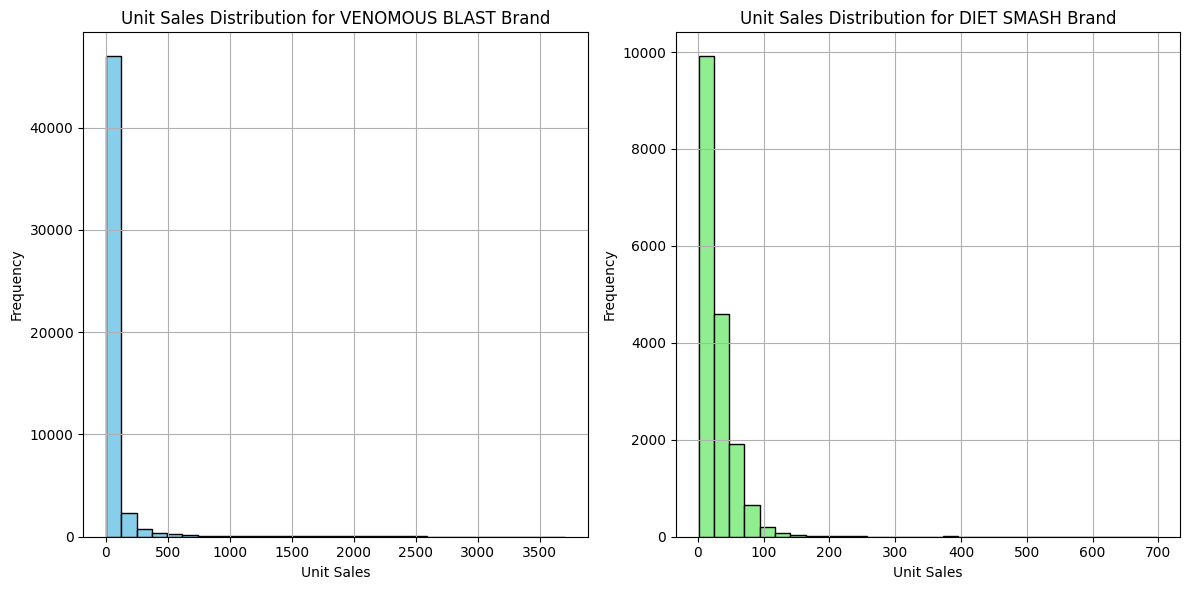

In [143]:
import matplotlib.pyplot as plt

# Filter the data for 'VENOMOUS BLAST' and 'DIET SMASH' brands
venomous_blast_data = market_demand[market_demand['BRAND'] == 'VENOMOUS BLAST']
diet_smash_data = market_demand[market_demand['BRAND'] == 'DIET SMASH']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 'VENOMOUS BLAST' brand
axes[0].hist(venomous_blast_data['UNIT_SALES'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Unit Sales Distribution for VENOMOUS BLAST Brand')
axes[0].set_xlabel('Unit Sales')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot for 'DIET SMASH' brand
axes[1].hist(diet_smash_data['UNIT_SALES'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Unit Sales Distribution for DIET SMASH Brand')
axes[1].set_xlabel('Unit Sales')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Plot confirms presence of outliers. Diving deep:

In [144]:
import numpy as np
venomous_blast_data = market_demand[market_demand['BRAND'] == 'VENOMOUS BLAST']

#  percentile values
percentiles = np.arange(75, 96, 5)  # Percentiles from 75 to 95 in steps of 5
percentiles = np.append(percentiles, np.arange(96, 101, 1))  # Percentiles from 96 to 100 in steps of 1
percentile_values = np.percentile(venomous_blast_data['UNIT_SALES'], percentiles)

percentile_table = pd.DataFrame({'Percentile': percentiles, 'Value': percentile_values})
percentile_table

,Percentile,Value
0,75,40.25
1,80,52.00
2,85,72.00
3,90,115.00
4,95,231.00
5,96,299.00
6,97,402.00
7,98,594.90
8,99,1612.80
9,100,3701.00


Table for VB above proves to us that even until 98 percentile, the values closely follow and match with the maximum value for DIET SMASH which is about 700. However, the 99th and 100th percentile values of 1600 and 3700 are ridiculously high in the scope of this dataset.

In this context, these outliers account for VB's higher mean value and hence we will proceed to consider average sales values to be more or less same for both the brands.


<h3> Summary </h3>

- We filtered the dataset by extracting data corresponding to Plum + Swire + Diet and developed Prophet model after validating model performance over unseen data (test set). 
- Model MAPE error is .. over the test set. 

- From the forecast obtained from the model, we observe best 13 weeks are week 0 to week 12 where week 0 starts from the 1st week of December as we have taken minimum data in the dataset as the 1st week. 

- The obtained forecast for the best 13 weeks are about 9060 in total unit sales.

- Using Historic Ratio method, we analyzed and comapred the remaining product attributes and found not much of a difference. Therefore the forecasted sales figure of 9060 will remain the final result for this innovative product.




<h2> Q5 </h2>  <a name="Q5_Modelling"></a>

- Item Description: Greetingle Health Beverage Woodsy Yellow .5L 12One Jug
- Caloric Segment: Regular
- Market Category: ING Enhanced Water
- Manufacturer: Swire-CC
- Brand: Greetingle
- Package Type: .5L 12One Jug
- Flavor: ‘Woodsy Yellow’

<i> Swire plans to release this product for 13 weeks, but only in one region. Which region would it perform best in? </i>

Look at region wise distribution for two parameter - manufacturer & brand:

- With Swire + Greetingle set we only have ING ENHANCED WATER category which matches with the category, however Caloric Segment available is only Diet. Let's break down Regular type seperately later.


- Now with manufacturer + Brand + Category, we observe the below distribution of total unit sales:


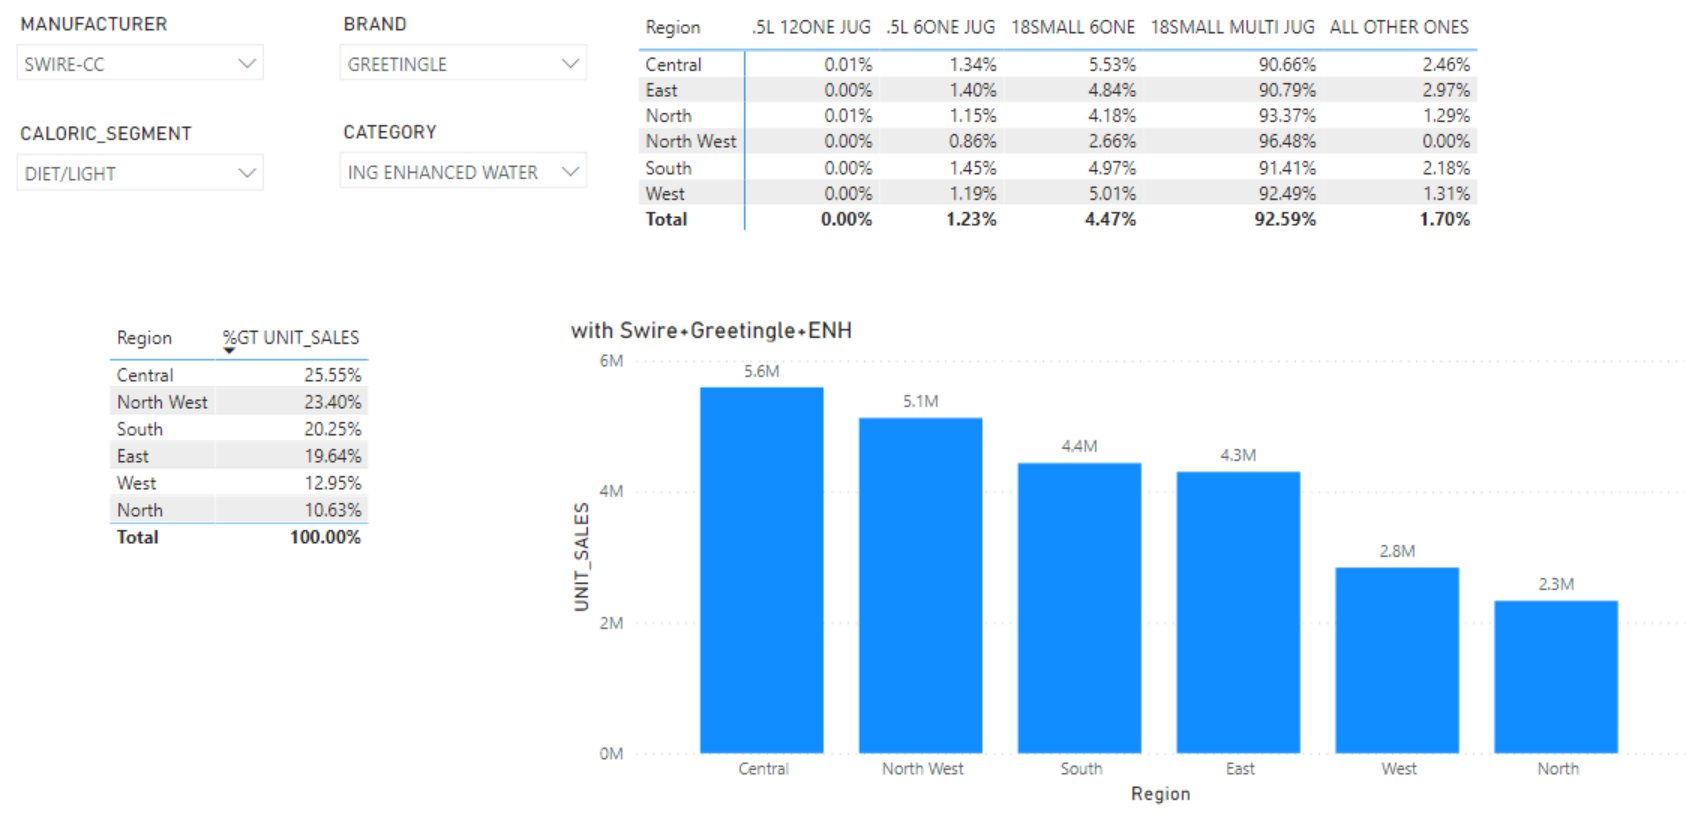

With regards to package type ".5L 12One Jug", above 3 (manufacturer + Brand + Category) filters set, we see that there are about 5 package types the beverages were sold. Over 90% of the sales have come from "18SMALL MULTI JUG" type.

Looks like package type ".5L 12One Jug" planned to be used for this innovative product were not used much by Greetingle & Swire and would not have any impact on identifying best region keeping technical & domain knowledge in mind and hence, we will neglect package type from further analysis.

On applying flavor ‘Woodsy Yellow’ + Regular + ING ENHANCED WATER, we see only COCOS manufacturer has experimented with this combination. Let's gauge the region wise sales:

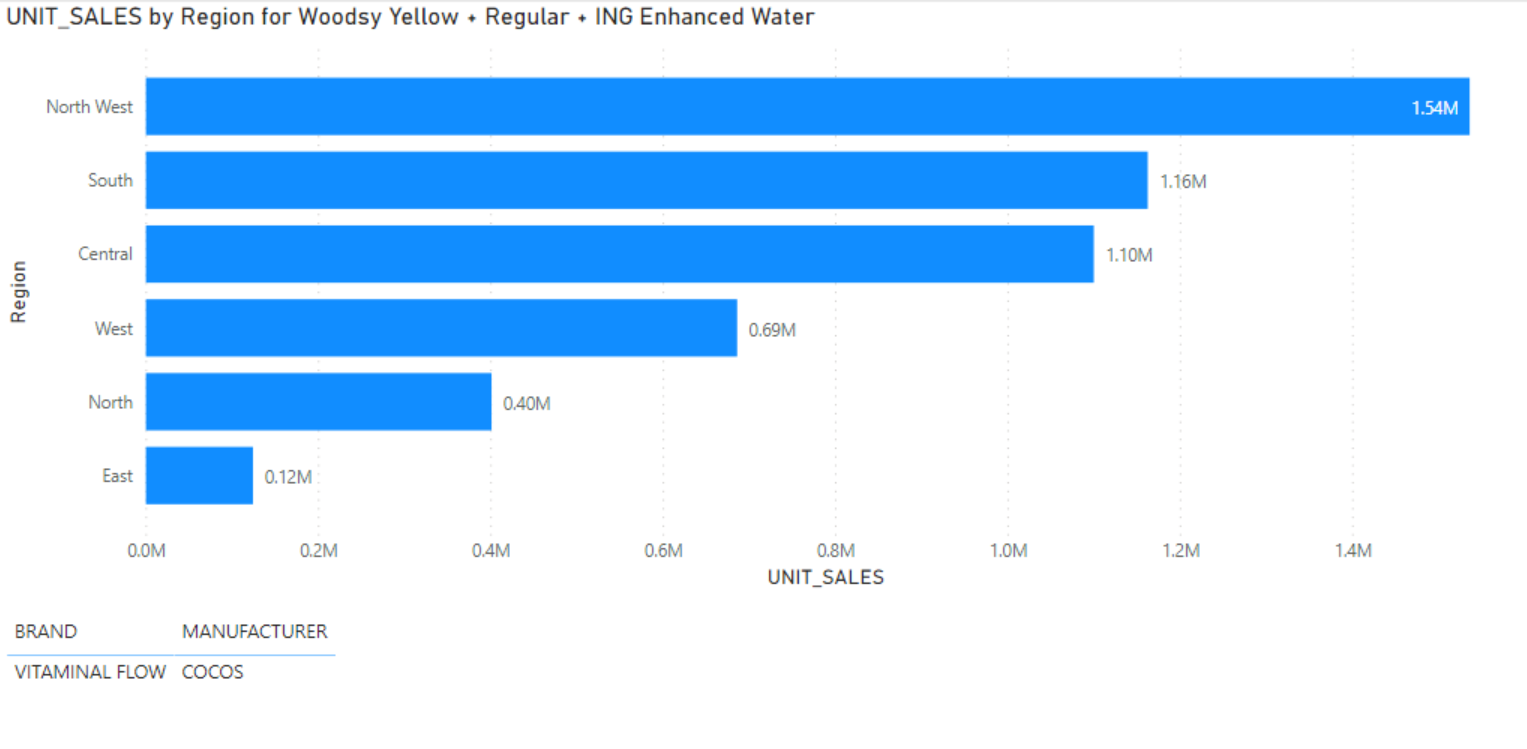

Lets compare sales by region for Woodsy Yellow, overall sales vs ENH water vs Regular:

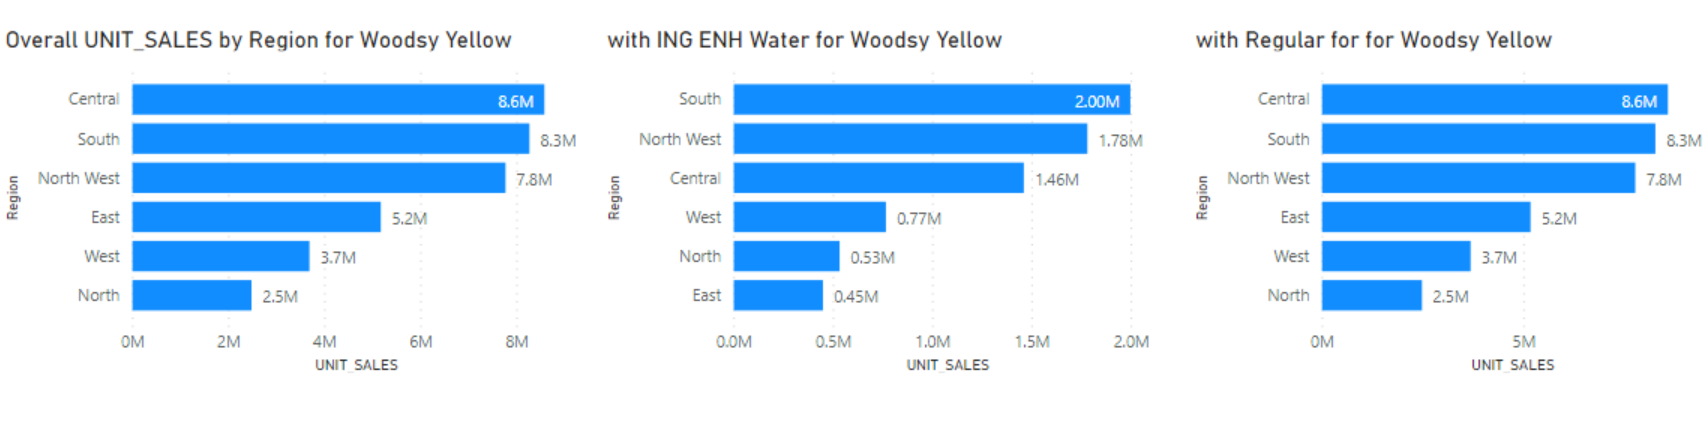

From all the analysis uptil this point, we have seen that Central, North West and South regions have consistently topped the charts be it Brand/Manufacturer/Caloric Segment/Flavor/Categor and even for a combination of these.

Lets deep dive into these 3 regions by time. Since we don't have to forecast or look at the absolute figures of sales, ideal chart in this case would be a ribbon chart over a regular line chart:

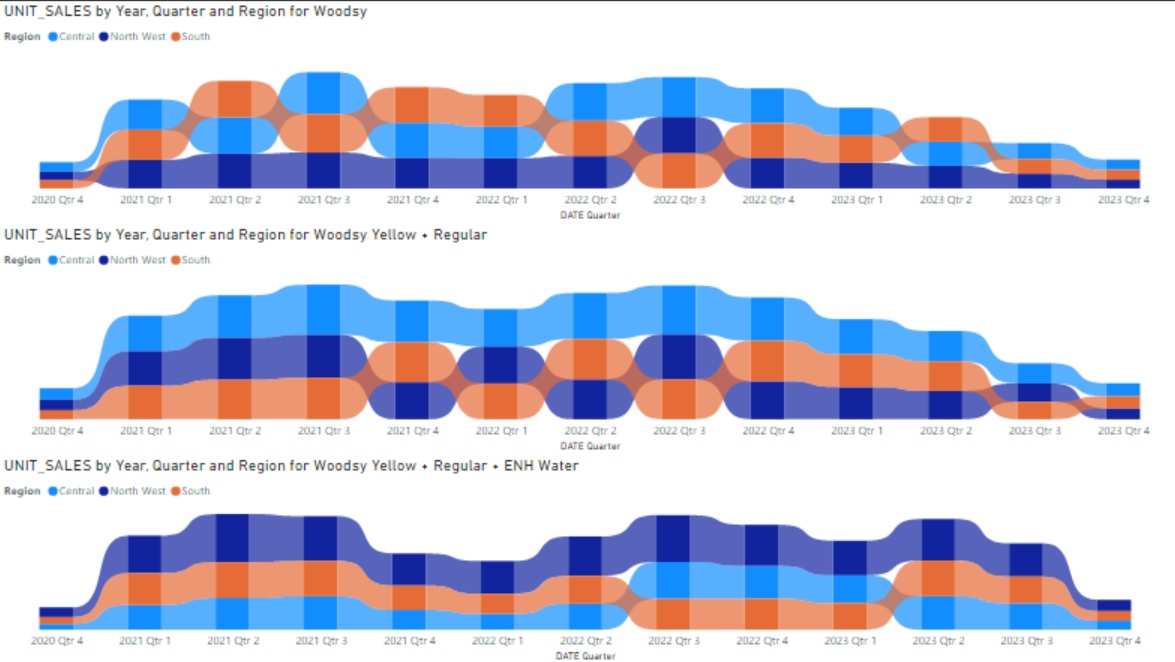

For Flavor alone: Central with little competition from South

Flavor + Regular: Central clear winner

Flavor + Regular + ENH Water: NW clear winner

Now for brand, brand + ENH Water:

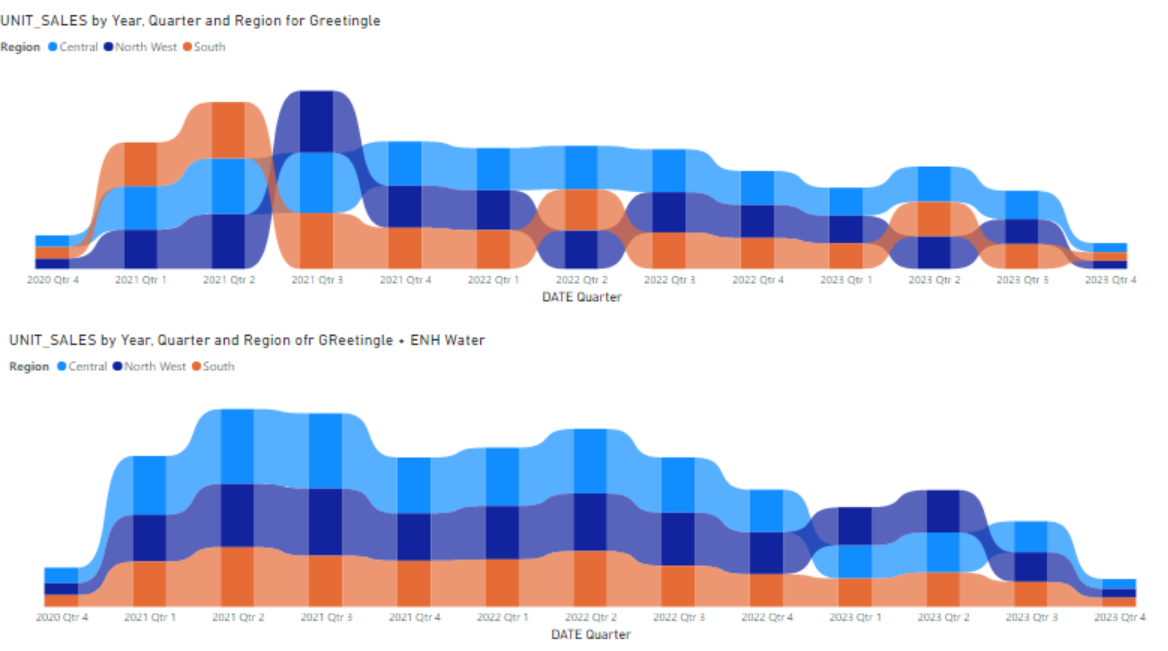

For Brand alone : Central winner for the most part

Brand + ENH Water: Central again

From the previous two results, we can safely eliminate South region as it has some significant presence for flavor alone but when other parameter are filtered on top of it, then the sales dies rapidly compared to NW & Central regions.

Top Insights:
1. Greetingle brand has a strong presence in Utah & Colorado states.
2. Flavor Woodsy Yellow dominates overall in South but with Regular and ENH Water filters, it is Washington & Oregon states that leads.

<h2> Central vs NW Statistical Analysis:</h2>

In [240]:
consumer_demographics_zip_region = consumer_demographics[['Zip', 'State','REGION']]

consumer_demographics_region = consumer_demographics_zip_region[(consumer_demographics_zip_region['REGION'] == 'Central') | (consumer_demographics_zip_region['REGION'] == 'North West') ]
consumer_demographics_region['REGION'].value_counts()

REGION
North West    990
Central       800
Name: count, dtype: int64

In [241]:
# (consumer_demographics_region['Zip'].value_counts()>1).sum()

In [242]:
zip_cons = pd.merge(consumer_demographics_region, zip_to_market, left_on='Zip', right_on='ZIP_CODE', how='inner')
zip_cons = zip_cons.drop_duplicates(subset=['MARKET_KEY', 'REGION'])

In [243]:
merged_data = pd.merge(market_demand, zip_cons, on='MARKET_KEY', how='inner')

In [244]:
merged_data = merged_data.drop(['Zip','ZIP_CODE'], axis=1)

In [245]:
merged_data['State'].value_counts(normalize=True)

State
CO    0.381271
WA    0.263675
OR    0.228770
UT    0.126284
Name: proportion, dtype: float64

In [246]:
# Group by 'State' and calculate summary statistics for 'UNIT_SALES'
unit_sales_summary_by_state = merged_data.groupby('State')['UNIT_SALES'].describe()

unit_sales_summary_by_state

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
CO,4409784.0,158.650056,426.420239,0.04,11.0,43.0,133.0,11219.0
OR,2645953.0,156.398806,356.790827,0.04,13.0,49.0,144.0,11100.0
UT,1460597.0,196.563396,471.057990,0.04,13.0,51.0,167.0,14773.0
WA,3049667.0,145.675230,331.236478,0.04,12.0,48.0,138.0,9243.0


While Utah has the least number of sales count, it has the highest average sales per order. The max values suggests strong possibility of outliers or very large orders.

<b> Note: Since, it was informed that the dataset is cleaned, we will not analyze further and remove those records. </b>

In [247]:
print("unit sales:")
region_sales_stats = merged_data.groupby('REGION')['UNIT_SALES'].describe()
print(region_sales_stats)

# Group the data by 'REGION' and compute summary statistics for 'DOLLAR_SALES'
region_sales_summary = merged_data.groupby('REGION')['DOLLAR_SALES'].describe()

print("dollar sales:")
# Display the summary statistics
print(region_sales_summary)


unit sales:
                count        mean         std   min   25%   50%    75%      max
REGION                                                                         
Central     5870381.0  168.083194  438.258413  0.04  12.0  45.0  140.0  14773.0
North West  5695620.0  150.656967  343.386241  0.04  13.0  49.0  141.0  11100.0
dollar sales:
                count        mean          std   min    25%     50%     75%       max
REGION                                                                               
Central     5870381.0  575.904097  1464.522706  0.01  40.16  156.31  500.48  69472.26
North West  5695620.0  487.903103  1122.230124  0.01  44.68  159.52  458.65  46137.39


No significant difference for the unit sales, however Central region has more dollar sales worth of beverages sold over NW in the overall dataset.

In [248]:
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

earliest_date = merged_data['DATE'].min()

# Step 2: Calculate week numbers
merged_data['WEEK_NUMBER'] = ((merged_data['DATE'] - earliest_date).dt.days // 7) % 52

# Filter data for Central region
central = merged_data[merged_data['REGION'] == 'Central']

# Filter data for Northwest region
northwest = merged_data[merged_data['REGION'] == 'North West']


Now the plan of action here is similar to how we had two batch of filters applied for the visuals at top for this question, we will go ahead and filter the data accordingly and then build a prophet model to compare best 13 weeks sales region wise. This will help us arrive at the best region with statistical analysis support.

<h3> Greetingle + ENH Water Filtered Modelling: </h3>

In [249]:
# Step 3: Aggregate the data for every week

northwest_fil_1 = northwest[(northwest['BRAND']=='GREETINGLE') & (northwest['CATEGORY']=='ING ENHANCED WATER')]
northwest_fil_1 = northwest_fil_1.groupby('DATE')['UNIT_SALES'].sum().reset_index()
# central_fil_1 = northwest[(northwest['BRAND']=='GREETINGLE') & (northwest['CATEGORY']=='ING ENHANCED WATER')]
# weekly_data = northwest_fil_1.groupby('WEEK_NUMBER')['UNIT_SALES'].sum().reset_index()
northwest_fil_1.tail(1)

,DATE,UNIT_SALES
147,2023-10-28,19875.67


The last date is 2023-10-28

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Initialize and fit the Prophet model
p_model = Prophet()

nw_model_data1 = northwest_fil_1.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

p_model.fit(nw_model_data1)

# Create future dates for forecasting
future = p_model.make_future_dataframe(periods=52, freq='W')

# Make predictions
forecast = p_model.predict(future)

# Plot the forecast
plot_plotly(p_model, forecast)

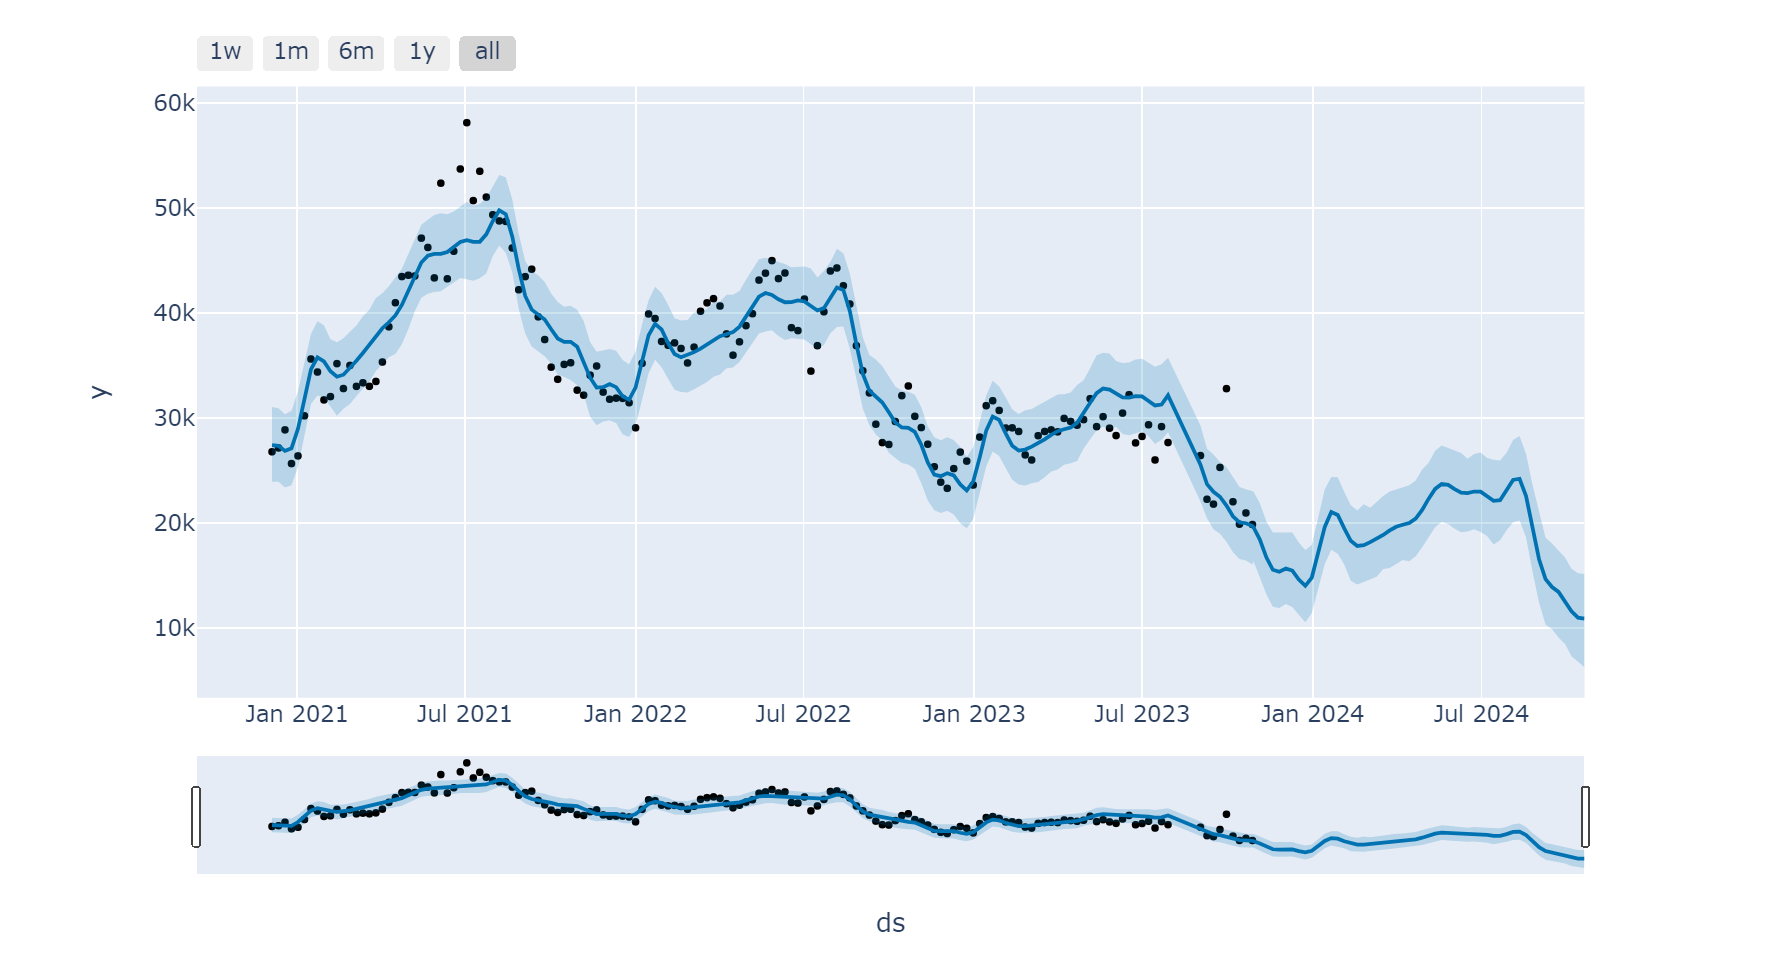

Observing a negative trend. Filtering the forecast of last 1 year:

In [251]:
# week wise sales for best 13 weeks
nw_fil1_forecast_1year = forecast[forecast['ds'] > '2023-10-28']
earliest_date = nw_fil1_forecast_1year['ds'].min()
nw_fil1_forecast_1year

# Step 2: Calculate week numbers
nw_fil1_forecast_1year['WEEK_NUMBER'] = ((nw_fil1_forecast_1year['ds'] - earliest_date).dt.days // 7) % 52
weekly_forecast_data = nw_fil1_forecast_1year.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

Taking rolling sum 13 week aggregate wise:

In [252]:
# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_forecast_data.iloc[i]['WEEK_NUMBER']}-{weekly_forecast_data.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

In [23]:
plotting:

SyntaxError: invalid syntax (2224340419.py, line 1)

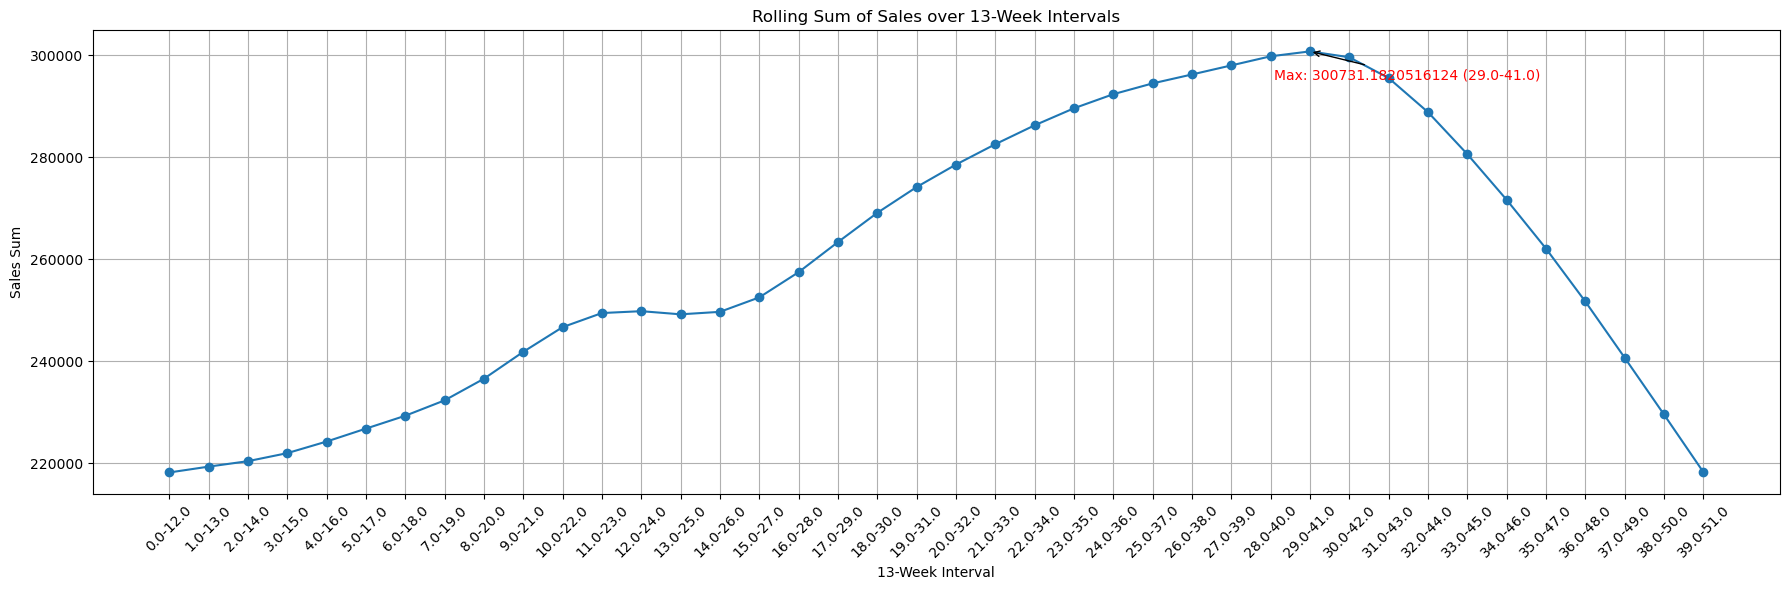

In [253]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()

Best 13 weeks obtained is 29-41 with a sale figure of 300k. 

In [254]:
total_fil1_nw = weekly_forecast_data['yhat'].sum()
total_13_week_sum = rolling_sales_df[rolling_sales_df['13_WEEK_INTERVAL']== '29.0-41.0'].sum()['SALES_13W_SUM']
percentage = total_13_week_sum*100/total_fil1_nw
print(round(percentage,2))

30.62


Best 13 weeks accounts for 30.62% of the 1 year sales. Lets do the same for central region now:

In [255]:
central_fil_1 = central[(central['BRAND']=='GREETINGLE') & (central['CATEGORY']=='ING ENHANCED WATER')]
central_fil_1 = central_fil_1.groupby('DATE')['UNIT_SALES'].sum().reset_index()
central_fil_1.tail(1)

,DATE,UNIT_SALES
147,2023-10-28,21070.0


The last date is 2023-10-28

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Initialize and fit the Prophet model
p_model_1 = Prophet()

cw_model_data1 = central_fil_1.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

p_model_1.fit(cw_model_data1)

# Create future dates for forecasting
future_1 = p_model_1.make_future_dataframe(periods=52, freq='W')

# Make predictions
forecast_1 = p_model_1.predict(future_1)

# Plot the forecast
plot_plotly(p_model_1, forecast_1)

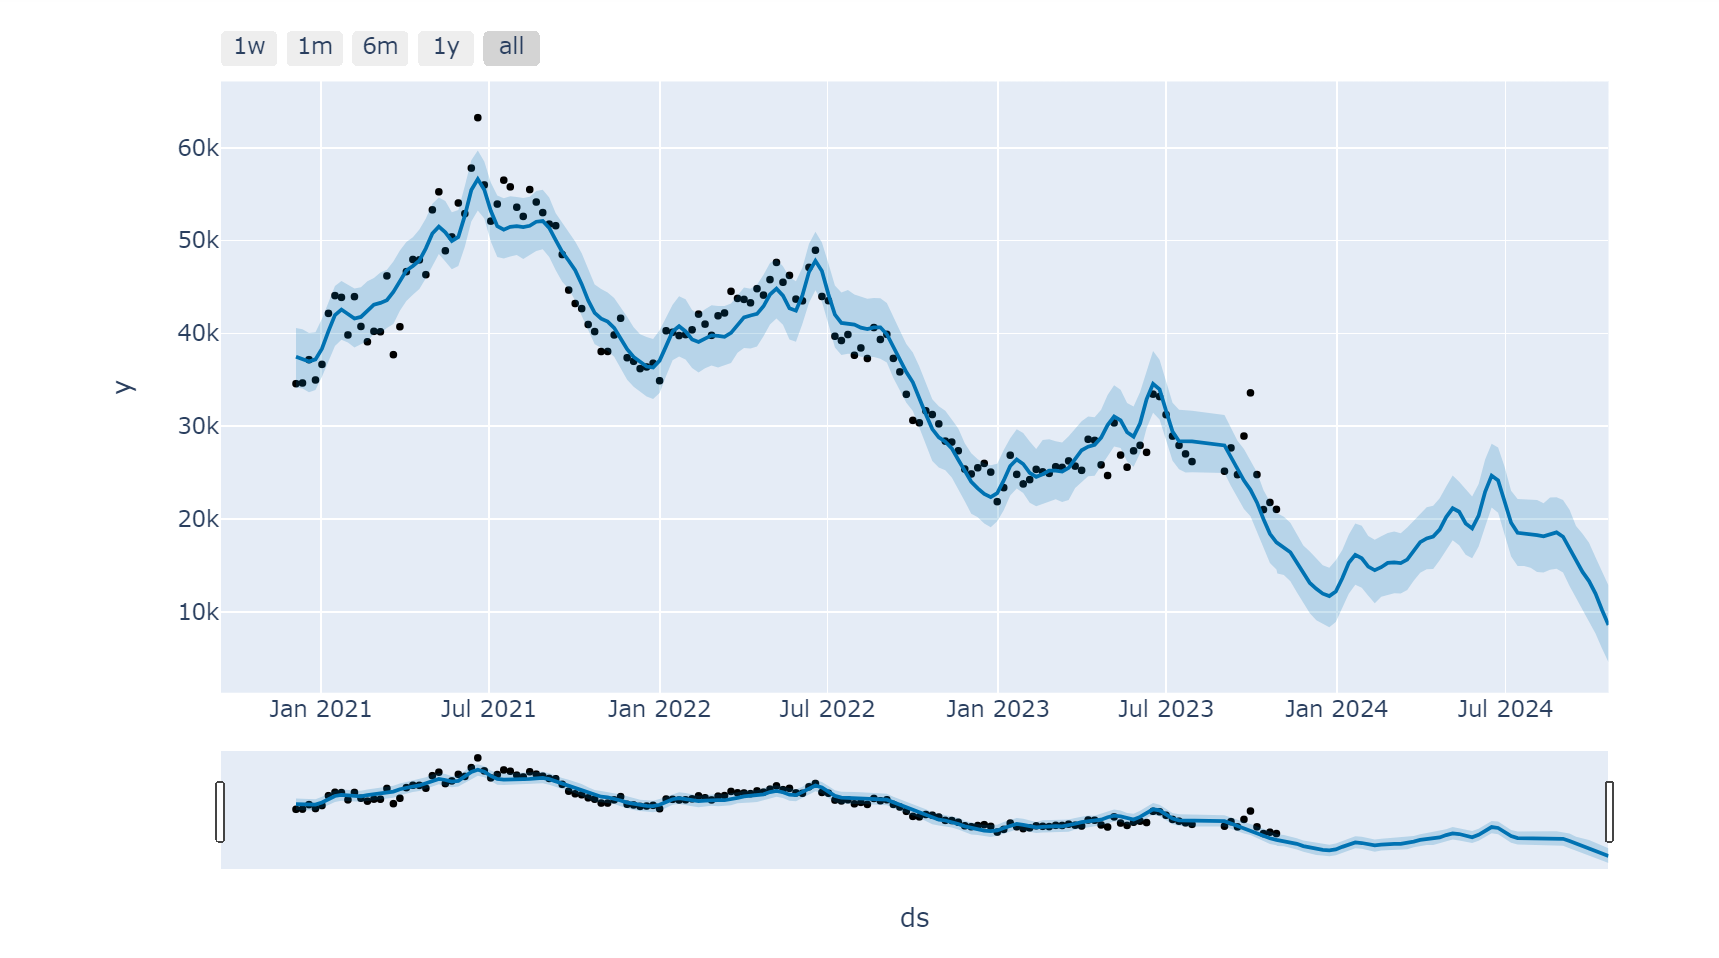

In [257]:
# week wise sales for best 13 weeks
cw_fil1_forecast_1year = forecast_1[forecast_1['ds'] > '2023-10-28']
earliest_date_1 = cw_fil1_forecast_1year['ds'].min()

# Step 2: Calculate week numbers
cw_fil1_forecast_1year['WEEK_NUMBER'] = ((cw_fil1_forecast_1year['ds'] - earliest_date_1).dt.days // 7) % 52
weekly_forecast_data_1 = cw_fil1_forecast_1year.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

In [258]:
# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data_1) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data_1) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data_1.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_forecast_data_1.iloc[i]['WEEK_NUMBER']}-{weekly_forecast_data_1.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

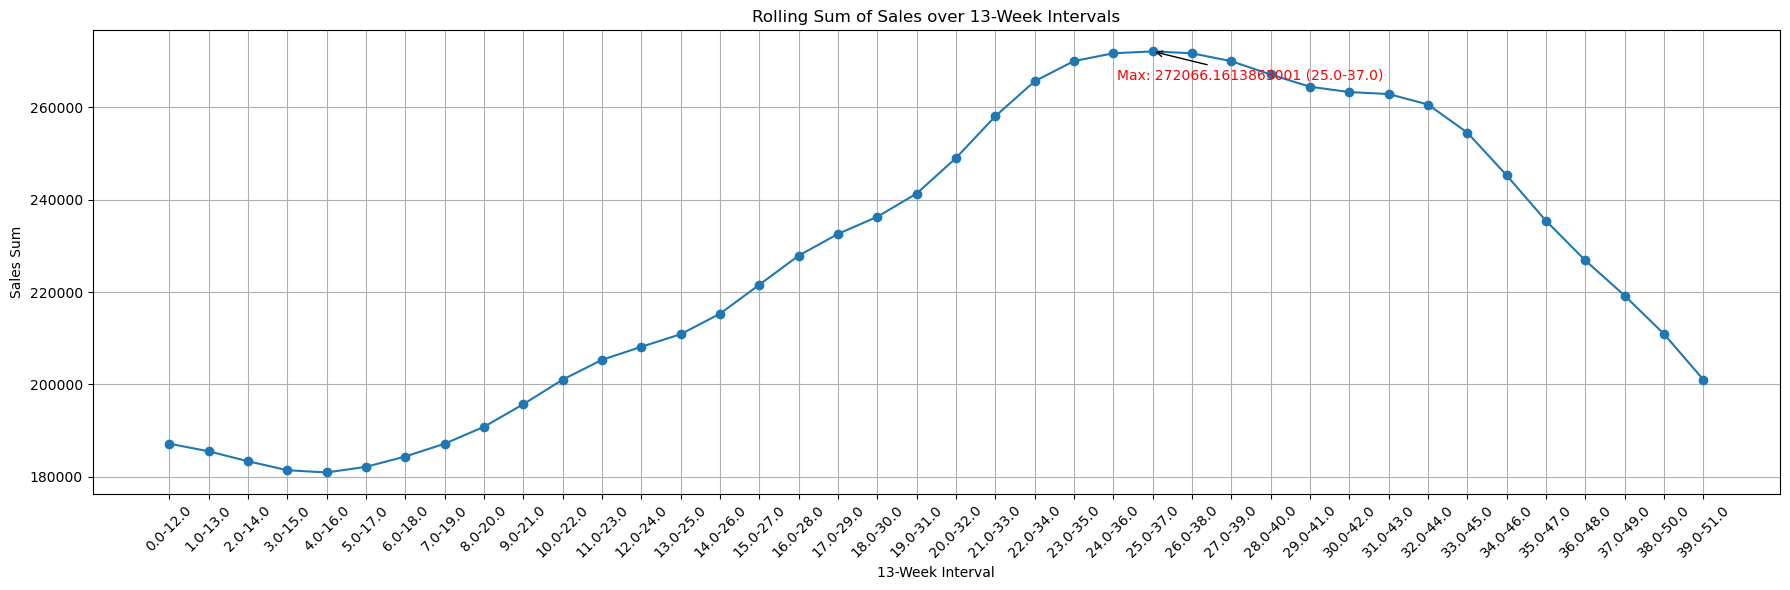

In [259]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()

In [260]:
total_fil1_central = weekly_forecast_data_1['yhat'].sum()
total_13_week_sum_central = rolling_sales_df[rolling_sales_df['13_WEEK_INTERVAL']== '25.0-37.0'].sum()['SALES_13W_SUM']
percentage = total_13_week_sum_central*100/total_fil1_central
print(round(percentage,2))

31.24


Best 13 weeks accounts for 31.24% of the 1 year sales.

### Woodsy Yellow + Regular + Enh Water Filter Modelling

In [261]:
northwest = merged_data[merged_data['REGION'] == 'North West']
woodsy_yellow = northwest[(northwest['ITEM'].str.contains('WOODSY  YELLOW ', case=False, regex=True))]
woodsy_yellow_regular = woodsy_yellow[woodsy_yellow['CALORIC_SEGMENT'] == 'REGULAR']
woodsy_yellow_regular_enhanced_water = woodsy_yellow_regular[woodsy_yellow_regular['CATEGORY'] == 'ING ENHANCED WATER']

In [262]:
woodsy_yellow_regular_enhanced_water['MANUFACTURER'].value_counts()

MANUFACTURER
COCOS    12285
Name: count, dtype: int64

In [263]:
northwest_woodsy = woodsy_yellow_regular_enhanced_water.groupby('DATE')['UNIT_SALES'].sum().reset_index()
northwest_woodsy.tail(1)

,DATE,UNIT_SALES
147,2023-10-28,9717.0


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Initialize and fit the Prophet model
p_model_3 = Prophet()

northwest_woodsy = northwest_woodsy.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

p_model_3.fit(northwest_woodsy)

# Create future dates for forecasting
future_3 = p_model_3.make_future_dataframe(periods=52, freq='W')

# Make predictions
forecast_3 = p_model_3.predict(future_3)

# Plot the forecast
plot_plotly(p_model_3, forecast_3)

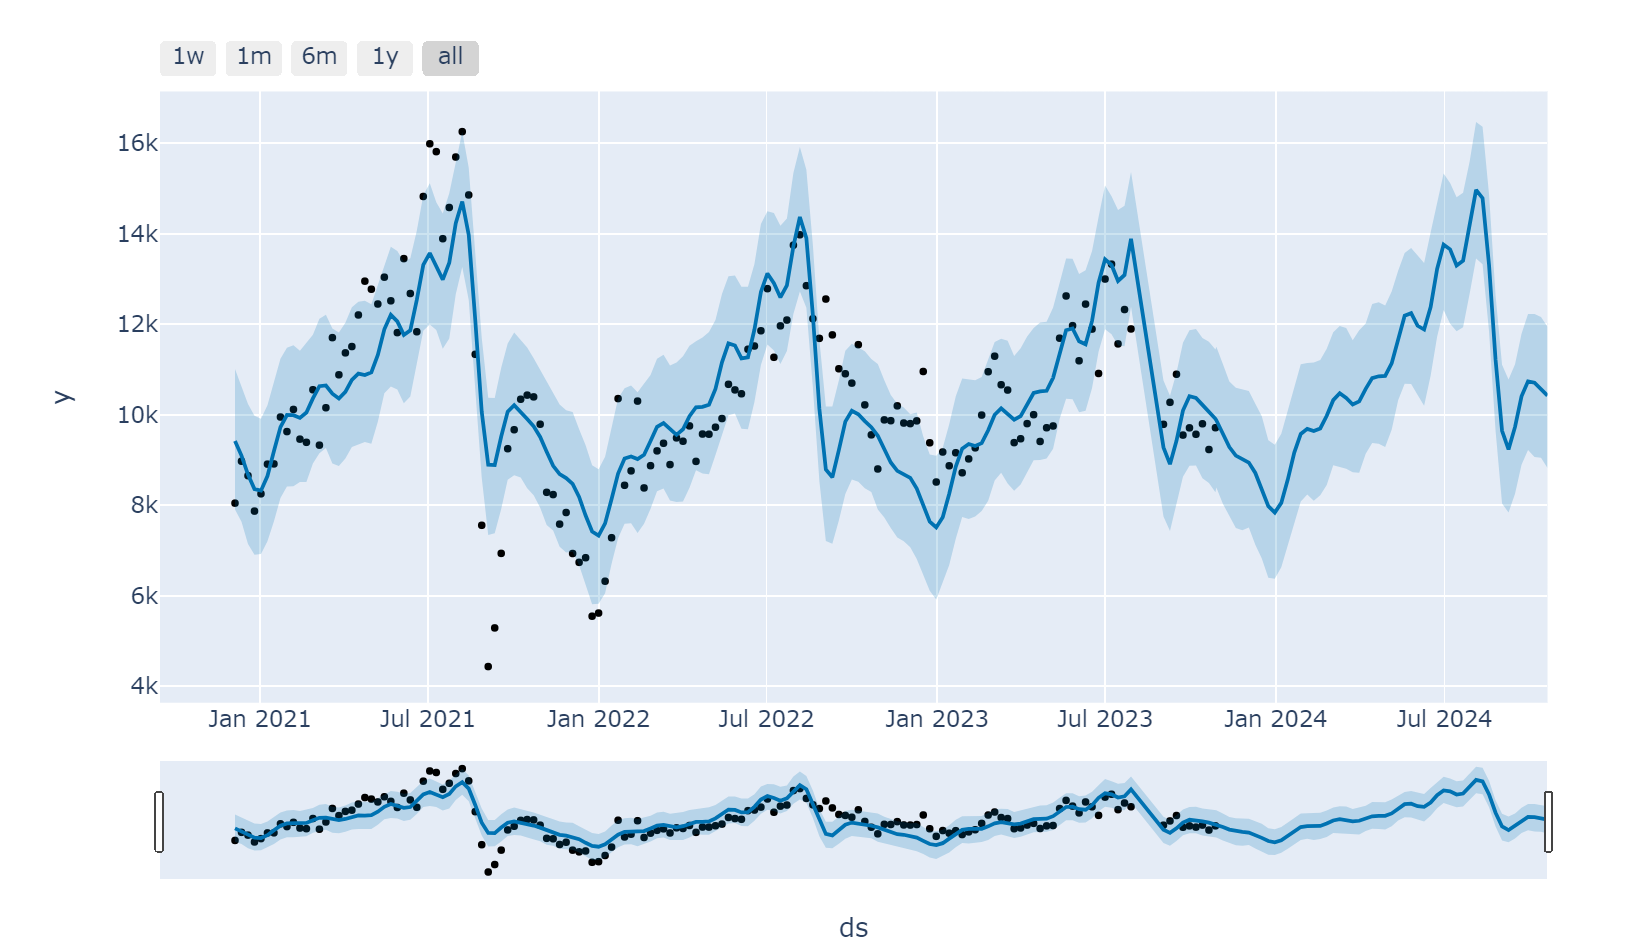

In [265]:
# week wise sales for best 13 weeks
northwest_woodsy_forecast_1year = forecast_3[forecast_3['ds'] > '2023-10-28']
earliest_date_4 = northwest_woodsy_forecast_1year['ds'].min()

# Step 2: Calculate week numbers
northwest_woodsy_forecast_1year['WEEK_NUMBER'] = ((northwest_woodsy_forecast_1year['ds'] - earliest_date_4).dt.days // 7) % 52
weekly_forecast_data_northwest_woodsy = northwest_woodsy_forecast_1year.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

In [266]:
# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data_northwest_woodsy) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data_northwest_woodsy) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data_northwest_woodsy.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_forecast_data_northwest_woodsy.iloc[i]['WEEK_NUMBER']}-{weekly_forecast_data_northwest_woodsy.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

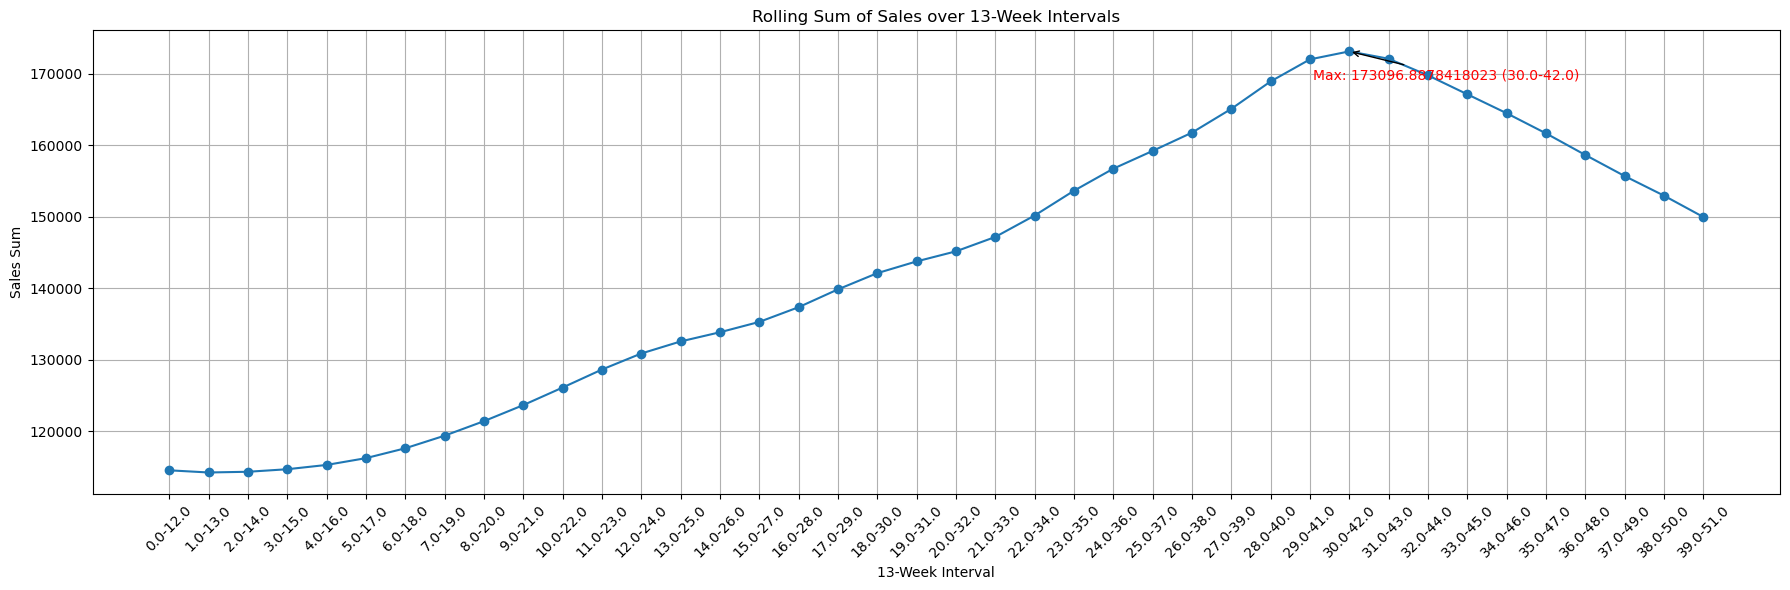

In [267]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()

In [268]:
total_fil1_northwest_woodsy = weekly_forecast_data_northwest_woodsy['yhat'].sum()
total_13_week_sum_northwest_woodsy = rolling_sales_df[rolling_sales_df['13_WEEK_INTERVAL']== '30.0-42.0'].sum()['SALES_13W_SUM']
percentage = total_13_week_sum_northwest_woodsy*100/total_fil1_northwest_woodsy
print(round(percentage,2))

30.98


Best 13 weeks accounts for 30.98% of the 1 year sales. Lets do the same for Central region and South regions

In [269]:
central = merged_data[merged_data['REGION'] == 'Central']
woodsy_yellow_central = central[(central['ITEM'].str.contains('WOODSY  YELLOW ', case=False, regex=True))]
woodsy_yellow_central_regular = woodsy_yellow_central[woodsy_yellow_central['CALORIC_SEGMENT'] == 'REGULAR']
woodsy_yellow_central_regular_enhanced_water = woodsy_yellow_central_regular[woodsy_yellow_central_regular['CATEGORY'] == 'ING ENHANCED WATER']

In [270]:
woodsy_yellow_central_regular_enhanced_water['MANUFACTURER'].value_counts()

MANUFACTURER
COCOS    11438
Name: count, dtype: int64

In [271]:
central_woodsy = woodsy_yellow_central_regular_enhanced_water.groupby('DATE')['UNIT_SALES'].sum().reset_index()
central_woodsy.tail(1)

,DATE,UNIT_SALES
147,2023-10-28,7127.0


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Initialize and fit the Prophet model
p_model_4 = Prophet()

central_woodsy = central_woodsy.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

p_model_4.fit(central_woodsy)

# Create future dates for forecasting
future_5 = p_model_4.make_future_dataframe(periods=52, freq='W')

# Make predictions
forecast_5 = p_model_4.predict(future_5)

# Plot the forecast
plot_plotly(p_model_4, forecast_5)

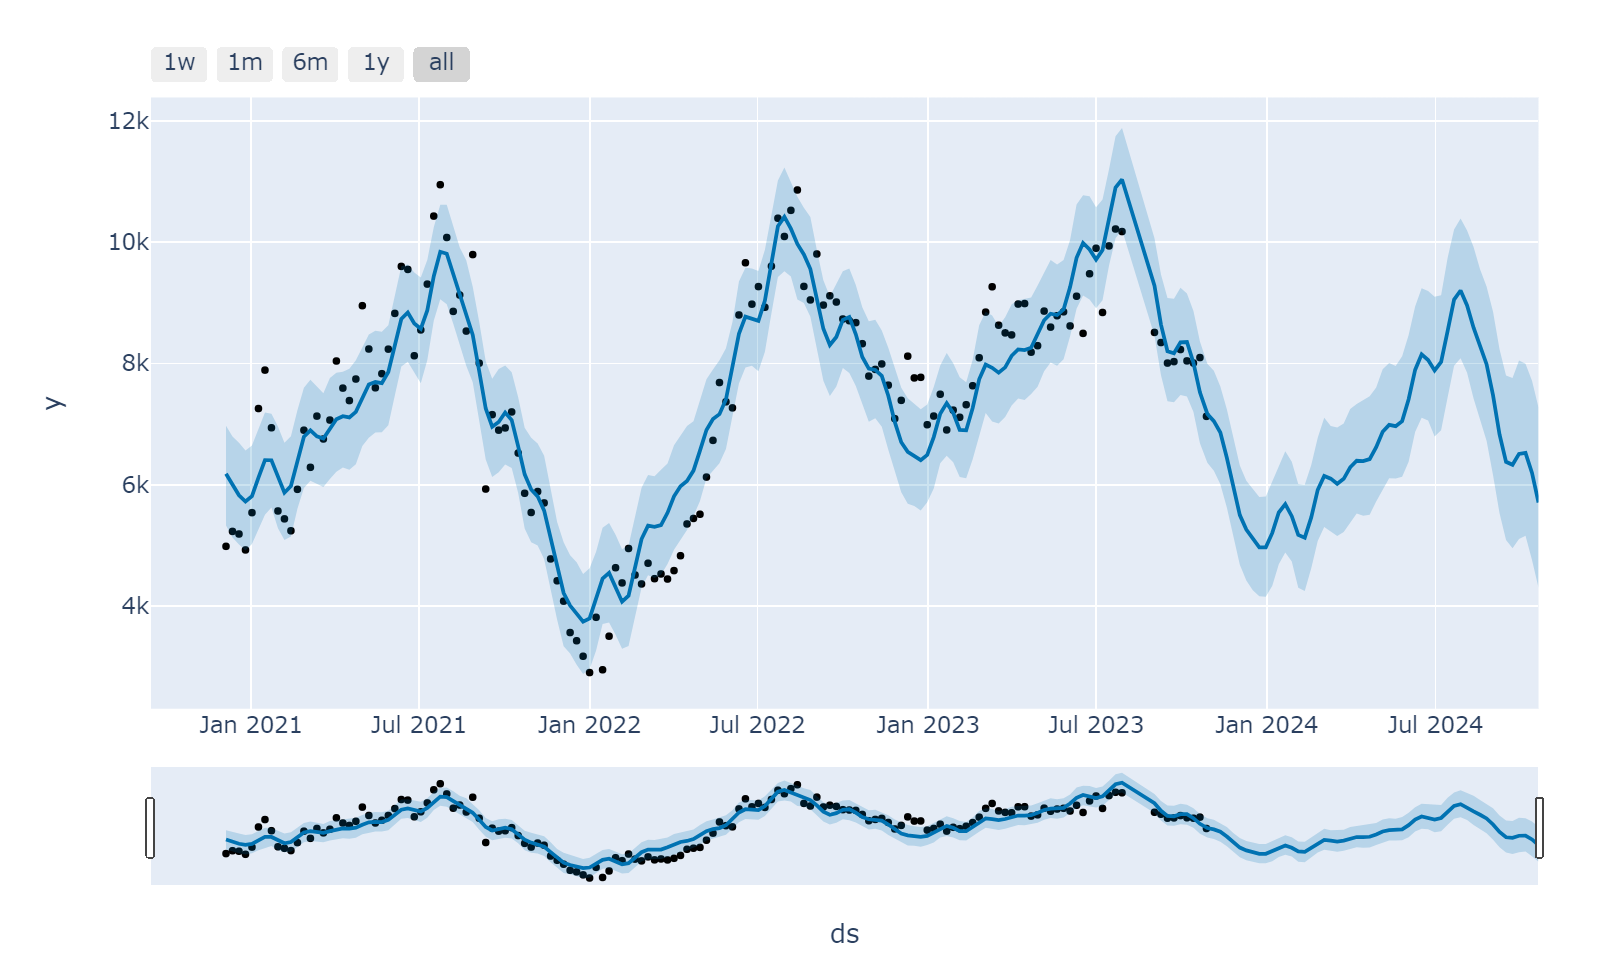

In [273]:
# week wise sales for best 13 weeks
central_woodsy_forecast_1year = forecast_5[forecast_5['ds'] > '2023-10-28']
earliest_date_6 = central_woodsy_forecast_1year['ds'].min()

# Step 2: Calculate week numbers
central_woodsy_forecast_1year['WEEK_NUMBER'] = ((central_woodsy_forecast_1year['ds'] - earliest_date_6).dt.days // 7) % 52
weekly_forecast_data_central_woodsy = central_woodsy_forecast_1year.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

In [274]:
# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data_central_woodsy) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data_central_woodsy) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data_central_woodsy.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_forecast_data_central_woodsy.iloc[i]['WEEK_NUMBER']}-{weekly_forecast_data_central_woodsy.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

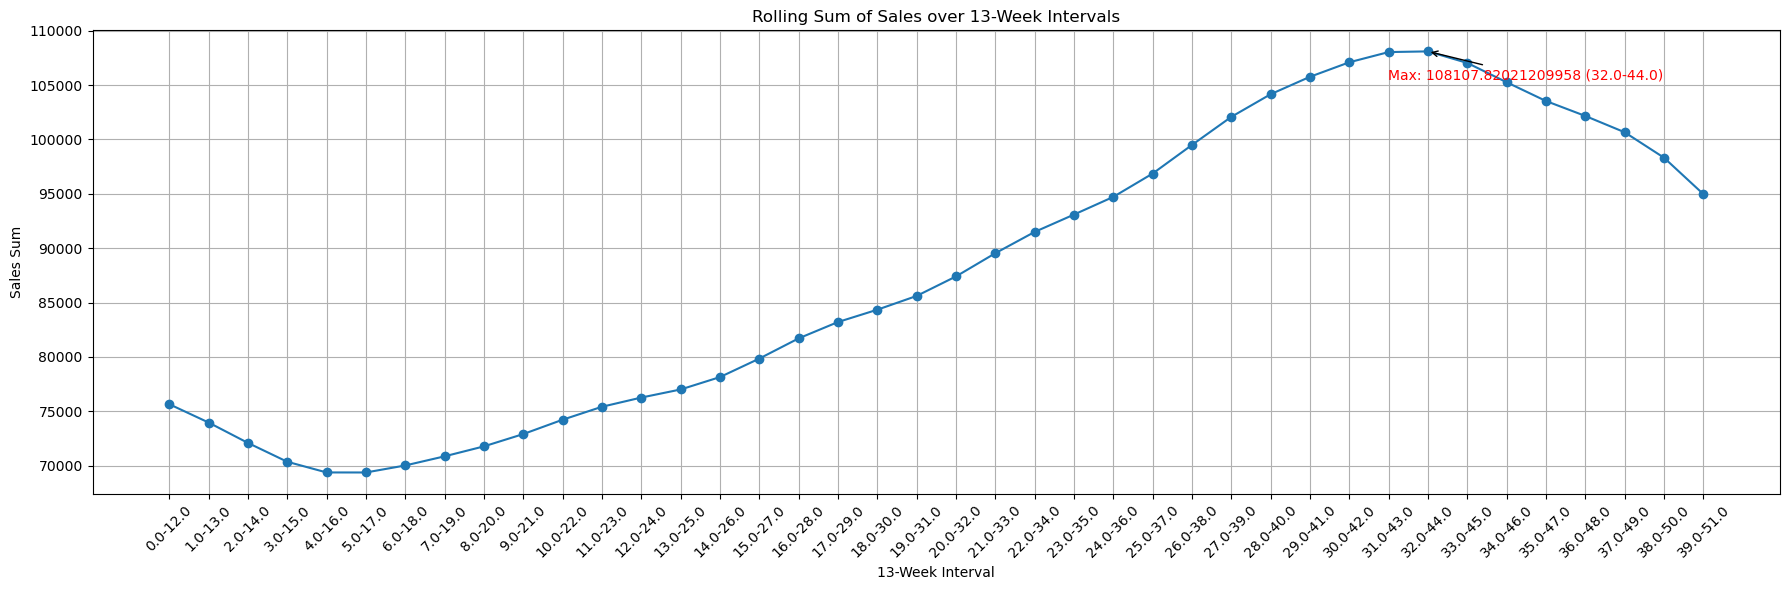

In [275]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()



In [276]:
total_fil1_central_woodsy = weekly_forecast_data_central_woodsy['yhat'].sum()
total_13_week_sum_northwest_central = rolling_sales_df[rolling_sales_df['13_WEEK_INTERVAL']== '32.0-44.0'].sum()['SALES_13W_SUM']
percentage = total_13_week_sum_northwest_central*100/total_fil1_central_woodsy
print(round(percentage,2))

31.14


Best 13 weeks accounts for 31.14% of the 1 year sales. Lets do the same for central region now:

In [277]:
import pandas as pd

data = {
    'Region': ['NorthWest', 'Central', 'NorthWest', 'Central'],
    'Filter': ['Brand  + Category', 'Brand  + Category ', 'Flavor + Caloric + Category ', 'Flavor  + Caloric + Category '],
    'Best 13 Weeks (Forecasted)': ['29 - 41', '25 - 37', '30 - 42', '32 - 44'],
    'Absolute Value (Unit Sales)': [300731, 272066, 173096, 108107],
    'Absolute Value Percentage for total weeks': ['30.62%', '31.24%', '30.98%', '31.14%']
}

df = pd.DataFrame(data)

df


,Region,Filter,Best 13 Weeks (Forecasted),Absolute Value (Unit Sales),Absolute Value Percentage for total weeks
0,NorthWest,Brand + Category,29 - 41,300731,30.62%
1,Central,Brand + Category,25 - 37,272066,31.24%
2,NorthWest,Flavor + Caloric + Category,30 - 42,173096,30.98%
3,Central,Flavor + Caloric + Category,32 - 44,108107,31.14%


- Based on the values of both the filters, NorthWest constituting higher absolute sales. Hence, NW will be the final region.
- The product could be launched in Northwest region with expected sales for the forecasted year to be around 173k with the best 13 weeks is 30 - 42.